We did a report of the visualization and regression analysis of the distribution of Airbnbs in four signal cities(Shanghai, Istanbul, Singapore and Tokyo) in Asia. We interpret the data about the basic attributes of Airbnb distribution from the website inside Airbnb. 

We mainly focused on the prices, room types, locations and popularity. After the visualization of the prices and popularity with room types and neighborhood in the four cities, We run the regressions to see which is the most significant factor to affect the price, then we decide which method is more accurate to predict. 

We also did a sentimental analysis to show the key words from the positive reviews for those four cities.

We hope to combine the data analysis, data visualization, and business insights, such as which factors contributed to the price more, and what do customers care about in terms of the sentimental analysis.

In [117]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as img
from PIL import Image
import requests
from io import BytesIO
import seaborn as sns
from scipy.stats import norm
from scipy import stats
%matplotlib inline

import statsmodels.formula.api as smf

 # Shanghai 
 ## 1.1 Data Visualization




In [118]:
sh = pd.read_csv('https://raw.githubusercontent.com/AmysnL/data-bootcamp-final-project/main/shanghai.csv')
sh.drop(['name','host_name','last_review'],axis = 1,inplace=True)
sh = sh.dropna(subset = ['reviews_per_month'])
sh = sh.loc[sh['price']>0,:]
sh.head(100)

id  host_id  neighbourhood_group           neighbourhood  latitude  \
0      24963    98203                  NaN    徐汇区 / Xuhui District  31.20918   
1      24991    98203                  NaN    徐汇区 / Xuhui District  31.21095   
2     139828   681552                  NaN    普陀区 / Putuo District  31.24399   
3     139846   681552                  NaN  静安区 / Jing'an District  31.24400   
5     185736   891951                  NaN    徐汇区 / Xuhui District  31.21968   
..       ...      ...                  ...                     ...       ...   
110  3904190  4471201                  NaN  虹口区 / Hongkou District  31.25960   
111  3904262  4471201                  NaN  虹口区 / Hongkou District  31.26088   
112  3907673  4471201                  NaN  虹口区 / Hongkou District  31.26069   
113  3907888  4471201                  NaN  虹口区 / Hongkou District  31.26029   
114  3907912  4471201                  NaN  虹口区 / Hongkou District  31.25996   

     longitude        room_type  price  minimum_nights  number_of_reviews  \
0    121.45150  Entire home/apt    468               3                 85   
1    121.45105  Entire home/apt    535               3                  1   
2    121.44296  Entire home/apt    355               3                 26   
3    121.44433  Entire home/apt    584               1                 57   
5    121.44930     Private room    500               1                  8   
..         ...              ...    ...             ...                ...   
110  121.50027     Private room    227              10                  5   
111  121.49711     Private room    187              10                  5   
112  121.49792  Entire home/apt    789               3                  2   
113  121.49665     Private room    201              10                  4   
114  121.49591     Private room    234               5                  1   

     reviews_per_month  calculated_host_listings_count  availability_365  
0                 0.69                               2               329  
1                 0.01                               2                68  
2                 0.25                              16               244  
3                 0.51                              16               227  
5                 0.17                               1               364  
..                 ...                             ...               ...  
110               0.10                              69               365  
111               0.07                              69               365  
112               0.04                              69               330  
113               0.05                              69               364  
114               0.05                              69               360  

[100 rows x 13 columns]

In [119]:
new_col = []
for i in sh['neighbourhood']:
    x = ''.join(i.split()[-2:])
    new_col.append(x)
sh['neighbourhood_en'] =new_col
#= sh['neighbourhood_en']


In [120]:
def import_img(web):
    response = requests.get(web)
    img = Image.open(BytesIO(response.content))
    return img

In [121]:
def scatter_a(city,df,sqrt,colorsize,figsize1,figsize2):#to create scatter map for the city
    mpl.rcParams.update(mpl.rcParamsDefault)
    %matplotlib inline
    
    cmap = plt.cm.coolwarm
    n = mpl.colors.Normalize()
    fig,ax = plt.subplots(figsize=(figsize1,figsize2))
    df.plot.scatter(ax=ax,x='longitude',y='latitude',s=df['price']**sqrt,
                color=cmap(n(df['availability_365'].values)*colorsize))
    ax.set_xlim(df['longitude'].min()-0.05,df['longitude'].max()+0.05)
    ax.set_ylim(df['latitude'].min()-0.05,df['latitude'].max()+0.05)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(city +' Airbnb Locations',size=14,fontweight='bold')
    return fig,ax
def map_range(df):#THis is to get the range of map of a certain city
    xl=df['longitude'].min()
    xh=df['longitude'].max()
    yl=df['latitude'].min()
    yh=df['latitude'].max()
    return xl,xh,yl,yh

def location(city,df,sqrt,colorsize,figsize1,figsize2):#to create scatter map for the city
    mpl.rcParams.update(mpl.rcParamsDefault)
    %matplotlib inline
    
    cmap = plt.cm.coolwarm
    n = mpl.colors.Normalize()
    fig,ax = plt.subplots(figsize=(figsize1,figsize2))
    df.plot.scatter(ax=ax,x='longitude',y='latitude',s=df['price']**sqrt,
                color=cmap(n(df['price'].values)*colorsize))
    ax.set_xlim(df['longitude'].min()-0.05,df['longitude'].max()+0.05)
    ax.set_ylim(df['latitude'].min()-0.05,df['latitude'].max()+0.05)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(city+' Airbnb Locations',size=14,fontweight='bold')
    return fig,ax


 #### 1.1 Location and availabiity Overview

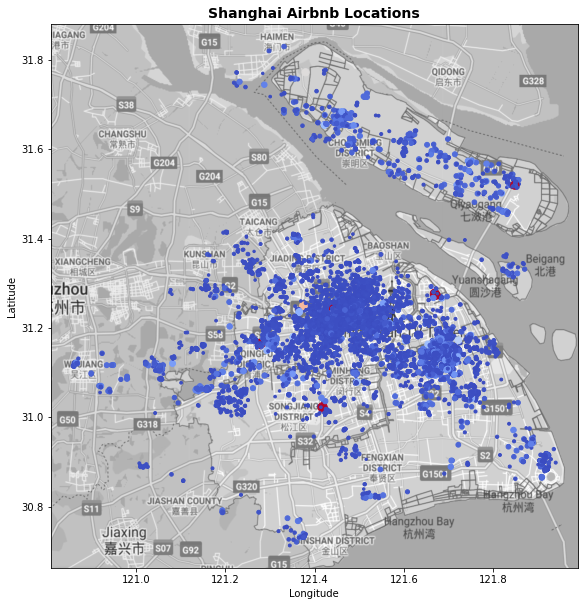

In [122]:
mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline
fig,ax = location('Shanghai', sh,0.4,1.8,10,10)
xl,xh,yl,yh = map_range(sh)
sh_map = import_img('https://github.com/570558305/dmafinal/blob/main/%E6%88%AA%E5%B1%8F2020-12-16%20%E4%B8%8B%E5%8D%883.35.09.png?raw=true')#po

bw_img = sh_map.convert('L')

ax.imshow(bw_img,extent=[xl-0.05 ,xh+0.23 ,yl-0.25 ,yh+0.13 ], cmap='gray')

#### Note that the colder the color, the cheaper the price, the red spot shows that the prices are really high.

The scatter plot here shows that the distribution of Airbnbs located in Shanghai. They mainly located in two parts in Shanghai, the one hub is located at the west of Oriental Tower, the other is located at the east of the tower.

In [123]:
def scatter_(city,df,sqrt,colorsize,figsize1,figsize2):#to create scatter map for the city
    mpl.rcParams.update(mpl.rcParamsDefault)
    %matplotlib inline
    
    cmap = plt.cm.coolwarm
    n = mpl.colors.Normalize()
    fig,ax = plt.subplots(figsize=(figsize1,figsize2))
    df.plot.scatter(ax=ax,x='longitude',y='latitude',s=df['availability_365']**sqrt,
                color=cmap(n(df['availability_365'].values)*colorsize))
    ax.set_xlim(df['longitude'].min()-0.05,df['longitude'].max()+0.05)
    ax.set_ylim(df['latitude'].min()-0.05,df['latitude'].max()+0.05)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(city+' Airbnb Locations',size=14,fontweight='bold')
    return fig,ax

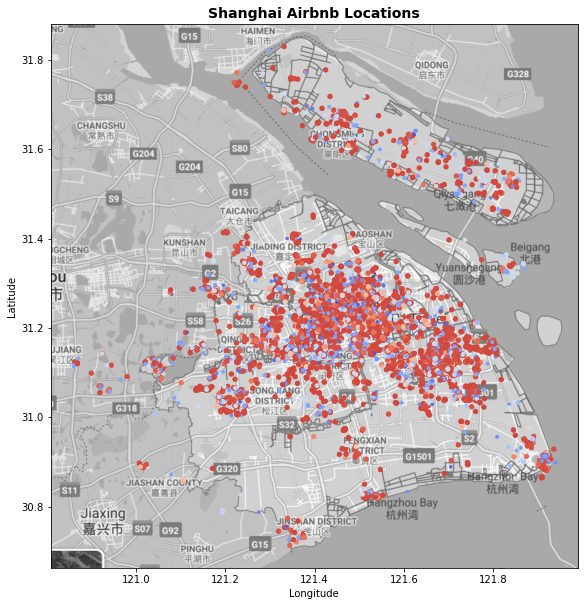

In [124]:
fig,ax = scatter_('Shanghai', sh,0.5,0.92,10,10)
xl,xh,yl,yh = map_range(sh)
sh_map = import_img('https://github.com/570558305/dmafinal/blob/main/%E6%88%AA%E5%B1%8F2020-12-16%20%E4%B8%8B%E5%8D%883.35.09.png?raw=true')#po

bw_img = sh_map.convert('L')
#plt.imshow(bw_img, cmap = 'gray')

ax.imshow(bw_img,extent=[xl-0.1 ,xh+0.2 ,yl-0.2 ,yh+0.14], cmap = 'gray')



#### The scatter plot shows the availability of airbnbs in Shanghai, the warmer the color, there are more available rooms at the airbnb represented by the spot, vice versa.

 #### 1.2 Neighborhood

 ##### 1.21 The distribution of Airbnbs in each district

In [125]:
pd.DataFrame(sh['neighbourhood'].unique())

0
0       徐汇区 / Xuhui District
1       普陀区 / Putuo District
2     静安区 / Jing'an District
3   长宁区 / Changning District
4      杨浦区 / Yangpu District
5     虹口区 / Hongkou District
6              浦东新区 / Pudong
7     黄浦区 / Huangpu District
8     嘉定区 / Jiading District
9     宝山区 / Baoshan District
10  松江区 / Songjiang District
11     青浦区 / Qingpu District
12   奉贤区 / Fengxian District
13  崇明区 / Chongming District
14    闵行区 / Minhang District
15    金山区 / Jinshan District

<AxesSubplot:>

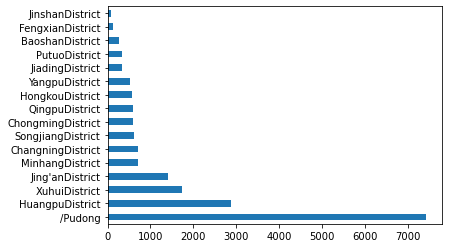

In [126]:
CountStatus = pd.value_counts(sh['neighbourhood_en'].values, sort=True)
CountStatus.plot.barh()

Pudong has the most airbnbs located, Huangpu, Xuhui and Jingan followed. Jinshan and Fengxian has the least airbnbs.

Text(0.5, 1.0, 'Numbers of Reviews for each room type in all districts')

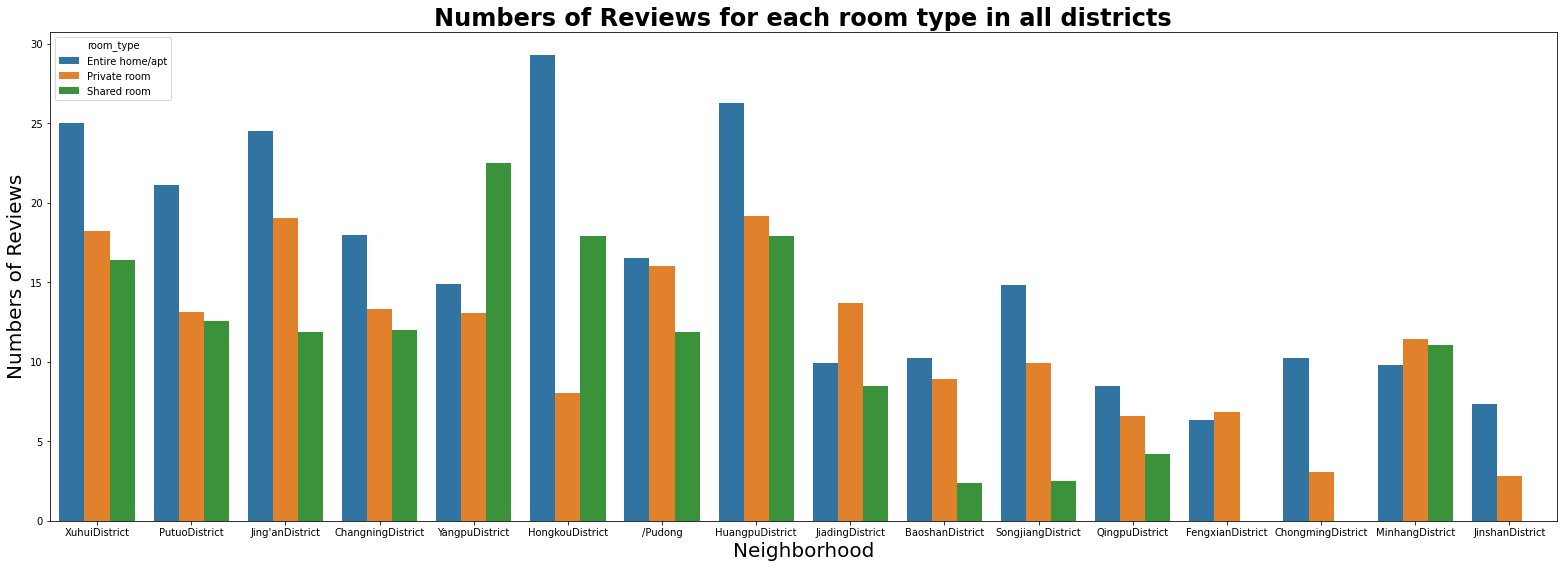

In [127]:
fig, ax = plt.subplots(figsize=(27,9))
ax =sns.barplot(data=sh, x="neighbourhood_en", y ='number_of_reviews', hue="room_type",ci=None )

ax.set_xlabel('Neighborhood',fontsize=20)
ax.set_ylabel('Numbers of Reviews',fontsize=20)
ax.set_title('Numbers of Reviews for each room type in all districts',fontweight='bold',fontsize=24)

The number of Reviews indicates the popularity of the rooms and neighborhood. We can see that the blue lines, which represents the entire home/apartment, are generally higher than others, especially in Hongkou, Huangpu and Jingan. Shared rooms in Yangpu and Xuhui, Private rooms in Huangpu, Xuhui and Jing'an are also very popular. 

#### 1.3 Host

In [128]:
top_host = sh['host_id'].value_counts()[:10]

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Host IDs')

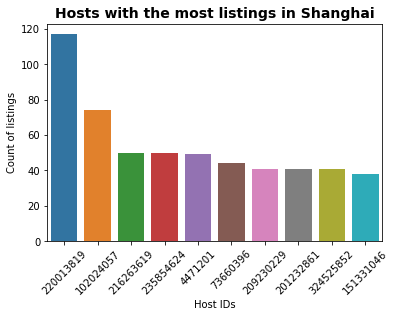

In [129]:
ax = sns.barplot(top_host.index, top_host.values,order=top_host.index)
ax.set_xticklabels(ax.get_xticklabels (),rotation=45)
ax.set_title('Hosts with the most listings in Shanghai',size=14,fontweight='bold')
ax.set_ylabel('Count of listings')
ax.set_xlabel('Host IDs')

Here is the top 10 hosts who has the most airnbnbs listed. Among them, 22013819 has the most listing which is over 100. 

Text(0.5, 1.0, 'The room type distribution of airbnbs of top 10 host in Shanghai')

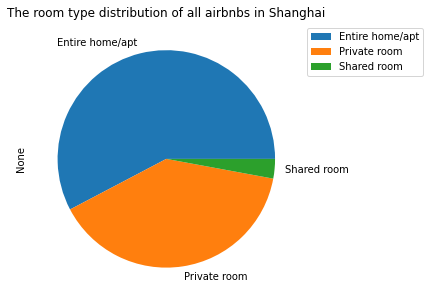

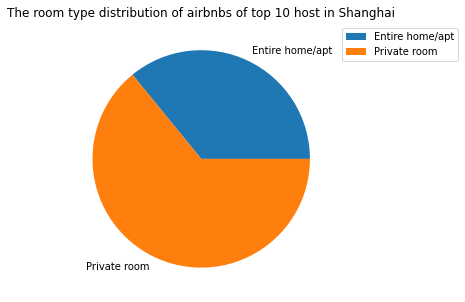

In [130]:
CountStatus = pd.value_counts(sh['room_type'].values, sort=True)
CountStatus.plot.pie(figsize = (5,5))
plt.legend(bbox_to_anchor=(1, 1))
plt.title('The room type distribution of all airbnbs in Shanghai')
x =sh["host_id"].value_counts().nlargest(n=10).index.values
host_220 = sh.loc[sh['host_id'].isin(x) ,:]
host_220 = sh.loc[sh['host_id']==220013819,:]

host_rt = host_220.groupby(['room_type'])[['room_type']].count()
fix,ax = plt.subplots(figsize = (5,5))
host_rt.plot(kind='pie',x='room_type',ax=ax,subplots=True)
ax.set_ylabel('  ')
ax.set_xlabel('')
plt.legend(bbox_to_anchor=(1, 1))
plt.title('The room type distribution of airbnbs of top 10 host in Shanghai')

#### The first pie chart shows that the room types of all the airbnbs located in Shanghai while the second shows that the room types of the airbnbs listed by the top 10 hosts. We can see those hosts who has more listings, the larger scale of business, prefer to provide private rooms rather than the entire rooms.

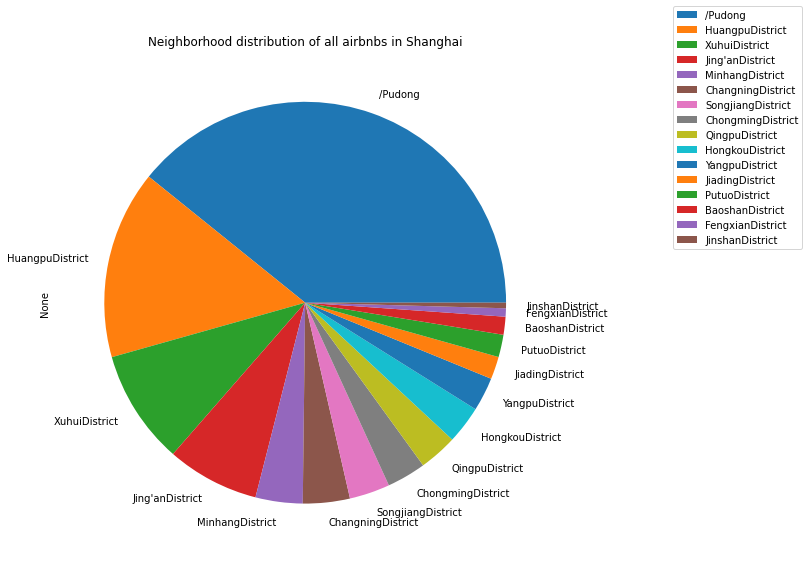

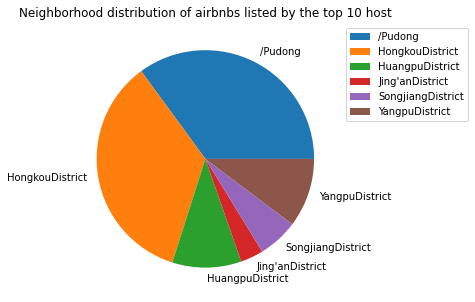

In [131]:

CountStatus = pd.value_counts(sh['neighbourhood_en'].values, sort=True)
CountStatus.plot.pie(figsize = (9,10))
plt.title('Neighborhood distribution of all airbnbs in Shanghai')
plt.legend(bbox_to_anchor=(1.5, 1.1))

host_n = host_220.groupby(['neighbourhood_en'])[['neighbourhood_en']].count()
fix,ax = plt.subplots(figsize = (7,5))
host_n.plot(kind='pie',x='neighbourhood_en',ax=ax,subplots=True)
ax.set_ylabel('  ')
ax.set_xlabel('')
plt.title('Neighborhood distribution of airbnbs listed by the top 10 host')
plt.legend(bbox_to_anchor=(1, 1))

#### The first pie chart shows that the neighborhood of all the airbnbs located in Shanghai while the second shows that the neighbourhood locations of the airbnbs listed by the top 10 hosts. We can see those hosts who has more listings, the larger scale of business, has more rooms at Hongkou and Yangpu than average. Their mainly distributions are in Pudong, Hongkou, Huangpu and Yangpu.

#### 1.4 Prices

Text(0.5, 1.0, 'Prices for each room type in all districts')

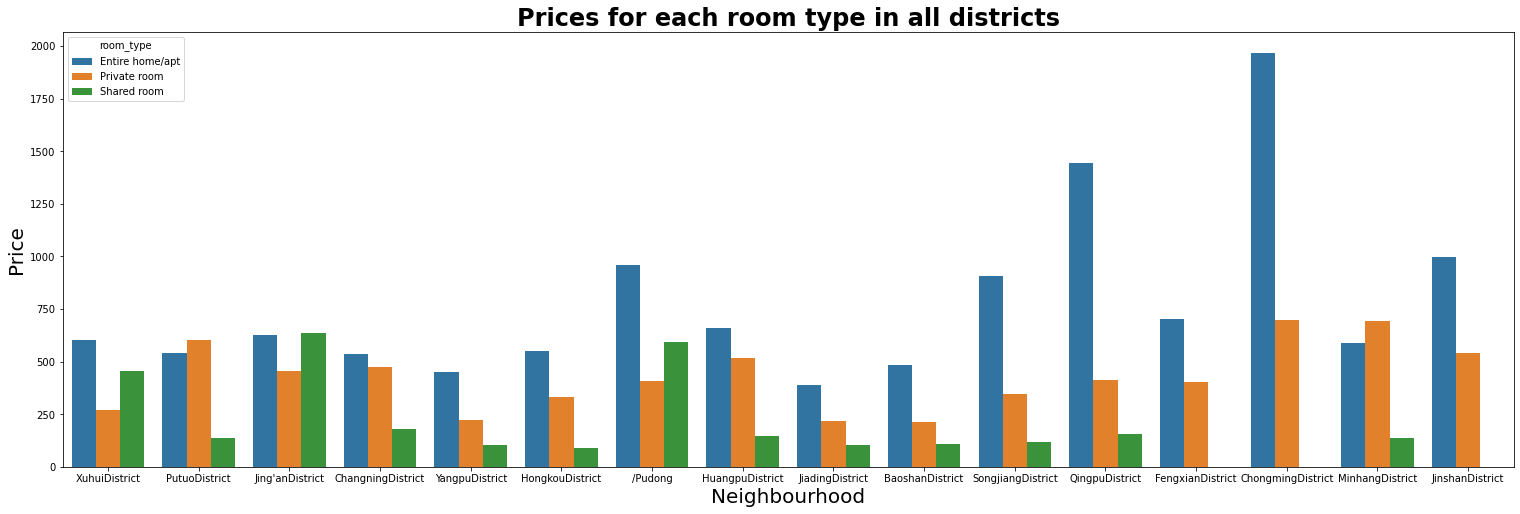

In [132]:
fig, ax = plt.subplots(figsize=(26,8))
ax =sns.barplot(data=sh, x="neighbourhood_en", y ='price', hue="room_type",ci=None)
ax.set_xlabel('Neighbourhood',fontsize=20)
ax.set_ylabel('Price',fontsize=20)
ax.set_title('Prices for each room type in all districts',fontweight='bold',fontsize=24)

#### The bar chart shows the prices distribution in all districts. It is clear that generally, the prices of entire room are higher, especially in Chongming, Qingpu, Jinshan, Songjiang and Pudong. The commonality of them is that they are all more far away from the center of Shanghai than the others. Also, the variance of the private room prices in all neighborhood are relatively small. 

Text(0.5, 1.0, 'Density and distribution of prices for each room type')

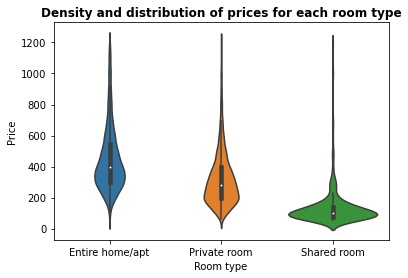

In [133]:
 
ax = sns.violinplot(data=sh[sh.price < 1200] ,x='room_type',y='price')

ax.set_xlabel('Room type')
ax.set_ylabel('Price')
ax.set_title('Density and distribution of prices for each room type',fontweight='bold')

### 2. Descriptive Data Analysis

#### 2.1Data Overview

In [134]:
sh.describe()

id       host_id  neighbourhood_group      latitude  \
count  1.897100e+04  1.897100e+04                  0.0  18971.000000   
mean   3.333042e+07  1.759078e+08                  NaN     31.194727   
std    9.492727e+06  9.776061e+07                  NaN      0.107171   
min    2.496300e+04  9.820300e+04                  NaN     30.712780   
25%    2.724361e+07  9.460691e+07                  NaN     31.141185   
50%    3.517468e+07  1.720595e+08                  NaN     31.203550   
75%    4.082778e+07  2.544090e+08                  NaN     31.233035   
max    4.601800e+07  3.722724e+08                  NaN     31.829920   

          longitude         price  minimum_nights  number_of_reviews  \
count  18971.000000  18971.000000    18971.000000       18971.000000   
mean     121.515302    625.776554        3.687101          17.615044   
std        0.150654   1619.554824       19.602914          32.296250   
min      120.859010     55.000000        1.000000           1.000000   
25%      121.443750    252.000000        1.000000           2.000000   
50%      121.484770    360.000000        1.000000           6.000000   
75%      121.661200    537.000000        1.000000          18.000000   
max      121.940020  70780.000000      500.000000         426.000000   

       reviews_per_month  calculated_host_listings_count  availability_365  
count       18971.000000                    18971.000000      18971.000000  
mean            1.139273                       15.756734        238.239418  
std             1.464565                       31.395970        128.279145  
min             0.010000                        1.000000          0.000000  
25%             0.190000                        3.000000         90.000000  
50%             0.590000                        8.000000        298.000000  
75%             1.480000                       16.000000        363.000000  
max            15.040000                      359.000000        365.000000

In [135]:
sh.isnull().sum()

id                                    0
host_id                               0
neighbourhood_group               18971
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
neighbourhood_en                      0
dtype: int64

In [136]:
sh.drop(columns=['neighbourhood_group'],axis=1,inplace=True)
sh

id    host_id             neighbourhood  latitude  longitude  \
0         24963      98203      徐汇区 / Xuhui District  31.20918  121.45150   
1         24991      98203      徐汇区 / Xuhui District  31.21095  121.45105   
2        139828     681552      普陀区 / Putuo District  31.24399  121.44296   
3        139846     681552    静安区 / Jing'an District  31.24400  121.44433   
5        185736     891951      徐汇区 / Xuhui District  31.21968  121.44930   
...         ...        ...                       ...       ...        ...   
35370  45980053  344682139  长宁区 / Changning District  31.22631  121.35636   
35502  46001320   89259546    黄浦区 / Huangpu District  31.22222  121.45827   
35506  46003354  152976705      徐汇区 / Xuhui District  31.18105  121.44647   
35510  46005230  246151722             浦东新区 / Pudong  30.91364  121.91692   
35565  46018001  323466730    静安区 / Jing'an District  31.25939  121.46204   

             room_type  price  minimum_nights  number_of_reviews  \
0      Entire home/apt    468               3                 85   
1      Entire home/apt    535               3                  1   
2      Entire home/apt    355               3                 26   
3      Entire home/apt    584               1                 57   
5         Private room    500               1                  8   
...                ...    ...             ...                ...   
35370  Entire home/apt    479               1                  1   
35502  Entire home/apt    326               1                  1   
35506  Entire home/apt    248               1                  1   
35510     Private room    133               1                  1   
35565  Entire home/apt    218               1                  1   

       reviews_per_month  calculated_host_listings_count  availability_365  \
0                   0.69                               2               329   
1                   0.01                               2                68   
2                   0.25                              16               244   
3                   0.51                              16               227   
5                   0.17                               1               364   
...                  ...                             ...               ...   
35370               1.00                               1               365   
35502               1.00                               9               365   
35506               1.00                              13                83   
35510               1.00                               1                87   
35565               1.00                              35               349   

        neighbourhood_en  
0          XuhuiDistrict  
1          XuhuiDistrict  
2          PutuoDistrict  
3        Jing'anDistrict  
5          XuhuiDistrict  
...                  ...  
35370  ChangningDistrict  
35502    HuangpuDistrict  
35506      XuhuiDistrict  
35510            /Pudong  
35565    Jing'anDistrict  

[18971 rows x 13 columns]

#### The Correlations here is about all the columns, however, not all of them are valid information. We set it as a reference that can be looked up if needed.

#### 2.2 Descriptive Data Analysis¶

In [137]:
# encode str 
en_sh = sh.copy()
en_sh['neighbourhood'] = en_sh['neighbourhood'].astype('category').cat.codes
en_sh['room_type'] = en_sh['room_type'].astype("category").cat.codes
mean = en_sh['reviews_per_month'].mean()
en_sh['reviews_per_month'].fillna(mean, inplace=True) ####
en_sh['log_price'] = np.log(en_sh.price+1)  #####
en_sh = en_sh.drop(columns=['id' ,'host_id','price']) # delete price column
en_sh.isnull().sum()

neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
neighbourhood_en                  0
log_price                         0
dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Price - Log')

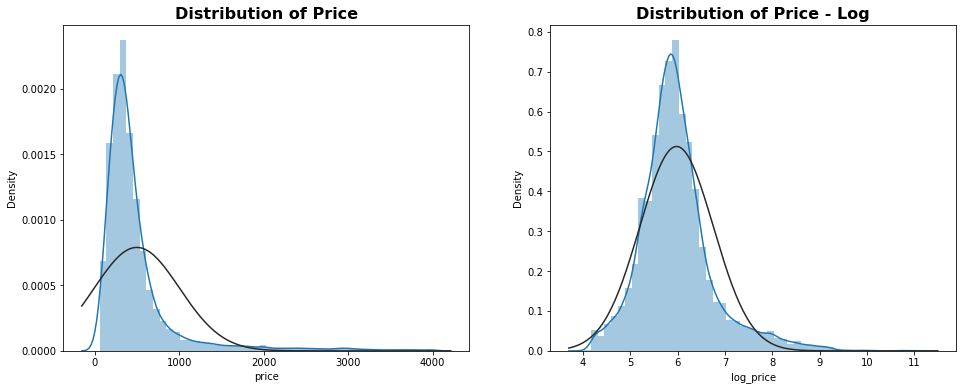

In [138]:
fig,ax = plt.subplots(1,2,figsize = (16,6))
sns.distplot(sh['price'].loc[sh['price'] <= 4000], fit = norm, ax = ax[0])
ax[0].set_title("Distribution of Price", size = 16,weight = 'bold')
sns.distplot(en_sh['log_price'],fit=norm , ax = ax[1])
ax[1].set_title("Distribution of Price - Log", size = 16,weight = 'bold')

#### We can see that the log-price distribution is approximately normal distribution of the mean of 6.

#### 2.3 Correlation

In [139]:
listings_df = sh

In [140]:
# Change data type
listings_price_df = listings_df[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365','latitude','longitude']]
listings_price_df[:5]

price  minimum_nights  number_of_reviews  reviews_per_month  \
0    468               3                 85               0.69   
1    535               3                  1               0.01   
2    355               3                 26               0.25   
3    584               1                 57               0.51   
5    500               1                  8               0.17   

   calculated_host_listings_count  availability_365  latitude  longitude  
0                               2               329  31.20918  121.45150  
1                               2                68  31.21095  121.45105  
2                              16               244  31.24399  121.44296  
3                              16               227  31.24400  121.44433  
5                               1               364  31.21968  121.44930

#### This is the correlation matrix showing relationships between different variables. 
#### This will help the host to improve decisions.

Text(0.5, 1.0, 'Correlation Matrix')

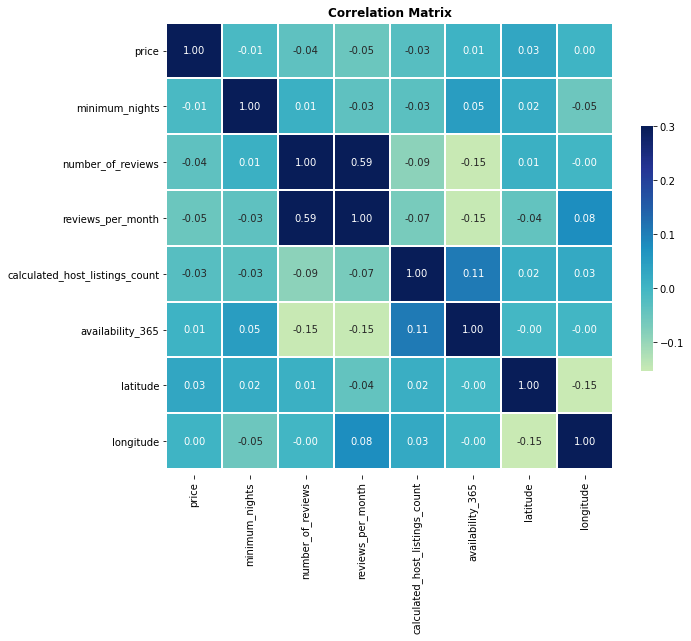

In [141]:
plt.figure(figsize=(10,10))
palette = sns.diverging_palette(20, 220, n=256)
corr=listings_price_df.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt=".2f", cmap="YlGnBu", vmax=.3, center=0,square=True, linewidths=1, cbar_kws={"shrink": .45}).set(ylim=(8.1,0))
plt.title("Correlation Matrix",size=12, weight='bold')

## 3. Regression

#### 3.1 Linear Regression

In [142]:
reg_price = smf.ols('price ~ neighbourhood +room_type + availability_365 + number_of_reviews + calculated_host_listings_count + reviews_per_month'
                    ,data=sh).fit()
print(reg_price.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     27.31
Date:                Fri, 18 Dec 2020   Prob (F-statistic):          3.28e-106
Time:                        10:26:47   Log-Likelihood:            -1.6683e+05
No. Observations:               18971   AIC:                         3.337e+05
Df Residuals:                   18949   BIC:                         3.339e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

#### Here we run an ordinary least square regression for price on factors that may affect the price through the exploration and observation. We have H0: beta = 0 against H1: beta != 0  for every beta in this regression model. 
#### From the regression result we can see that neighbourhood coontributed positively to Price. The neighbourhood that contributed the most is Chongming District.

#### 3.2 Log

In [143]:
reg_logprice = smf.ols('log_price ~ neighbourhood +room_type + availability_365 + number_of_reviews + calculated_host_listings_count + reviews_per_month'
                       ,data= en_sh).fit()
print(reg_logprice.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     663.5
Date:                Fri, 18 Dec 2020   Prob (F-statistic):               0.00
Time:                        10:26:47   Log-Likelihood:                -20360.
No. Observations:               18971   AIC:                         4.073e+04
Df Residuals:                   18964   BIC:                         4.079e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

### From the regressin result above, we can see that neighbourhood, room_type, availability_365, number_of_reviews, calculated_host_listings_count, and reviews_per_month, all contribute negatively to Price.
### Since the P value of neighbourhood is greater than 5%, its impact on price is not significant.

## 4. Machine Learning

In [144]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(en_sh[['room_type']].values, en_sh[['log_price']].values,
                                                        test_size=0.25, random_state=0)


#### (1) KNN

In [289]:
from sklearn.neighbors import KNeighborsRegressor as knn
from sklearn.model_selection import cross_val_score
scores = pd.Series(dtype='float')
for i in range(20,1200,40):
    scores[str(i)] = cross_val_score(knn(n_neighbors=i),X_train1, y_train1,cv=5).mean()
indx = scores.idxmax()

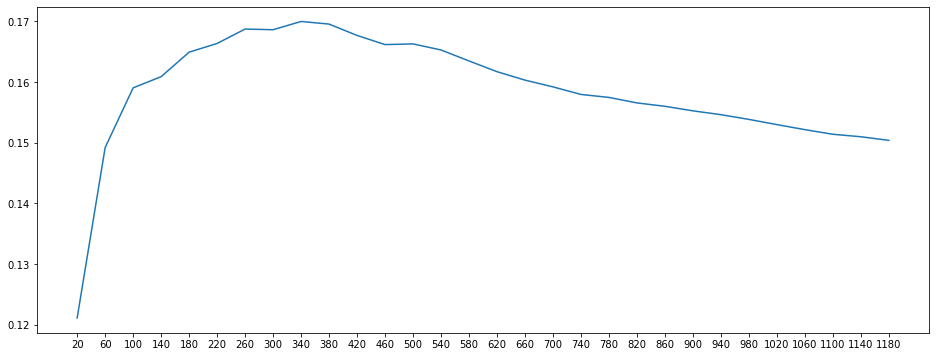

In [146]:
fig,ax = plt.subplots(figsize=(16,6))
plt.plot(scores.index,scores.values)

In [147]:
skl_knn = knn(n_neighbors = int(indx)).fit(X_train1, y_train1)  #####
knn_score1 = skl_knn.score(X_test1,y_test1)
print(knn_score1)

0.170708579377991


#### (2) Random Forest

In [148]:
from sklearn.ensemble import RandomForestRegressor as rf
cross_val_score(rf(n_estimators = 100, max_depth = 3), X_train1, y_train1.ravel(), cv=5).mean()


0.1708614249914519

In [149]:
cv_scores = pd.DataFrame()
for i in range (1,25):
    cv_scores.loc[i,'rf'] = cross_val_score(rf(n_estimators = 100, max_depth = i), X_train1, y_train1.ravel(),cv=5).mean()

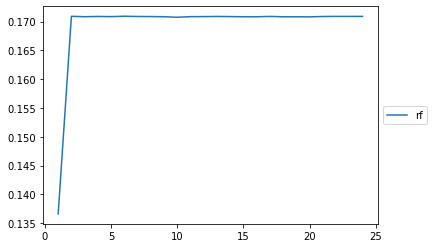

In [150]:
ax = cv_scores.plot()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [151]:
indx = scores.idxmax()
skl_rf = rf(n_estimators=100,max_depth=int(indx)).fit(X_train1, y_train1.ravel())
rf_score1 = skl_rf.score(X_test1,y_test1)
print(rf_score1)

0.1779720637527994


In [152]:
score_table = pd.DataFrame({'K Nearest Neighbors':[knn_score1],'Random Forest':[rf_score1]})
score_table = score_table.T
score_table.columns = ['Score']
score_table

Score
K Nearest Neighbors  0.170709
Random Forest        0.177972

#### According to the table above, we can use Random Forest as the score for this model for log_price, which is higher than KNN.
#### However, the score of KNN and Random Forest are relatively low. It could be due to some intangible features such as 
#### the room quality, service friendliness, and the environment, etc

# Istanbul

In [153]:
istb = pd.read_csv('https://raw.githubusercontent.com/AmysnL/data-bootcamp-final-project/main/Istanbul.csv')



In [154]:
istb.head()

id                               name  host_id host_name  \
0   4826                          The Place     6603      Kaan   
1  20815  The Bosphorus from The Comfy Hill    78838    Gülder   
2  27271    LOVELY APT. IN PERFECT LOCATION   117026     Mutlu   
3  28277      Duplex Apartment with Terrace   121607      Alen   
4  28318    Cosy home overlooking Bosphorus   121721     Aydin   

   neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0                  NaN       Uskudar  41.05650   29.05367  Entire home/apt   
1                  NaN      Besiktas  41.06984   29.04545  Entire home/apt   
2                  NaN       Beyoglu  41.03254   28.98153  Entire home/apt   
3                  NaN         Sisli  41.04471   28.98567       Hotel room   
4                  NaN       Sariyer  41.09048   29.05559  Entire home/apt   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0    720               1                  1  2009-06-01               0.01   
1    816             365                 41  2018-11-07               0.33   
2    233              30                 13  2018-05-04               0.19   
3    761               3                  0         NaN                NaN   
4    823               3                  0         NaN                NaN   

   calculated_host_listings_count  availability_365  
0                               1               365  
1                               2               279  
2                               1               289  
3                              19               365  
4                               1                88

In [155]:
istb.drop(['name','host_name','last_review'],axis = 1,inplace=True)
istb = istb.dropna(subset = ['reviews_per_month'])
istb = istb.loc[istb['price']>0,:]
istb.head(100)

id  host_id  neighbourhood_group neighbourhood  latitude  longitude  \
0      4826     6603                  NaN       Uskudar  41.05650   29.05367   
1     20815    78838                  NaN      Besiktas  41.06984   29.04545   
2     27271   117026                  NaN       Beyoglu  41.03254   28.98153   
6     30697   132137                  NaN       Beyoglu  41.03350   28.97626   
7     33368   135136                  NaN         Sisli  41.05382   28.99739   
..      ...      ...                  ...           ...       ...        ...   
143  374837   466302                  NaN       Beyoglu  41.02752   28.97705   
144  378120  1899923                  NaN       Beyoglu  41.03499   28.97238   
145  378383  1900682                  NaN        Adalar  40.87361   29.13289   
147  385296   734040                  NaN       Sariyer  41.08679   29.05244   
148  391645  1958346                  NaN       Kadikoy  40.99609   29.02780   

           room_type  price  minimum_nights  number_of_reviews  \
0    Entire home/apt    720               1                  1   
1    Entire home/apt    816             365                 41   
2    Entire home/apt    233              30                 13   
6       Private room    768               1                  1   
7       Private room    384               2                  1   
..               ...    ...             ...                ...   
143  Entire home/apt    240               1                126   
144  Entire home/apt    733               7                 11   
145  Entire home/apt    734               2                 25   
147     Private room    144               7                 10   
148  Entire home/apt    500               3                 72   

     reviews_per_month  calculated_host_listings_count  availability_365  
0                 0.01                               1               365  
1                 0.33                               2               279  
2                 0.19                               1               289  
6                 0.01                               1               365  
7                 0.01                               2               364  
..                 ...                             ...               ...  
143               1.25                              15               365  
144               0.11                               1                 1  
145               0.26                               1               315  
147               0.11                               3               364  
148               0.72                               2                 1  

[100 rows x 13 columns]

## 1. Data Visualization

#### 1.1 Location and availabiity Overview

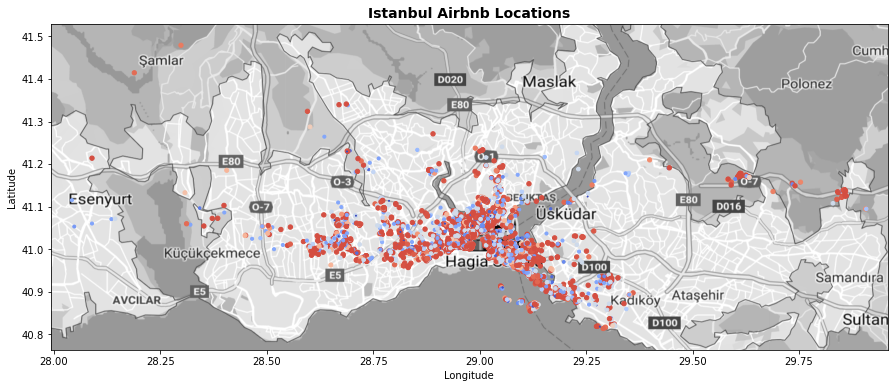

In [156]:
fig,ax = scatter_('Istanbul', istb,0.5,0.91,15,12)
xl,xh,yl,yh = map_range(istb)
istb_map = import_img('https://github.com/570558305/dmafinal/blob/main/istb.png?raw=true')#po

bw_img = istb_map.convert('L')
#plt.imshow(bw_img, cmap = 'gray')

ax.imshow(bw_img,extent=[xl-0.45 ,xh+0.7 ,yl-0.65  ,yh+0.3 ], cmap = 'gray')

#### Note that the colder the color, the cheaper the price, so the warmer the color, the higher the price. the red spot shows that the prices are higher.

 #### 1.2 Neighborhood

##### 1.21 The distribution of Airbnbs in each district

<AxesSubplot:>

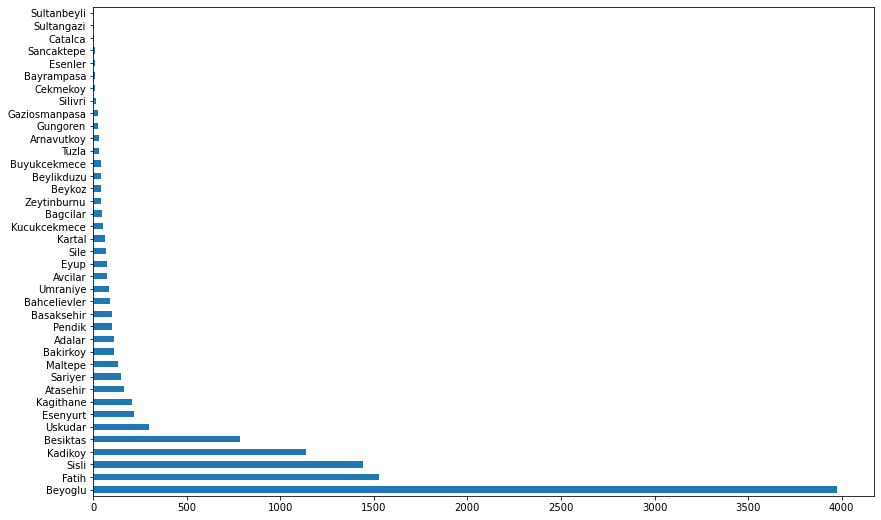

In [157]:
CountStatus = pd.value_counts(istb['neighbourhood'].values, sort=True)
CountStatus.plot.barh(figsize=(14,9))

#### Beyoglu, Fatih, and Sisli have the most airbnbs located.
Sultanbeyli, Sultangazi, and Catalca have the least airbnbs.

In [158]:
CountStatus.head(10)

Beyoglu      3976
Fatih        1525
Sisli        1444
Kadikoy      1137
Besiktas      783
Uskudar       296
Esenyurt      216
Kagithane     210
Atasehir      163
Sariyer       146
dtype: int64

In [159]:
istb['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [160]:
col = ['city']+list(istb['room_type'].unique())
review = pd.DataFrame(columns = col)
g = ['Atasehir', 'Besiktas', 'Beyoglu', 'Esenyurt', 'Fatih', 'Kadikoy',
       'Kagithane', 'Sariyer', 'Sisli', 'Uskudar'] #The top ten cities with the most number of airbnbs
review['city'] = g

In [161]:
d1 = istb.loc[istb['neighbourhood'].isin(g),:].groupby(['neighbourhood','room_type'])[['number_of_reviews']].sum()
d2 = d1.reset_index()
for c in review.columns.values[1:]:
    lst = d2.loc[d2['room_type']==c,['number_of_reviews']].values
    review[c] = lst
review

city  Entire home/apt  Private room  Shared room  Hotel room
0   Atasehir             1113            80            2         196
1   Besiktas             5301          2115            6          97
2    Beyoglu            81066         13573          442        2902
3   Esenyurt              683           155            1           2
4      Fatih            23795          9062          188        7164
5    Kadikoy             6711          4382           58          47
6  Kagithane              599           261            1          14
7    Sariyer              578           242           11           6
8      Sisli             9644          3555          142         239
9    Uskudar             1434           726            3           2

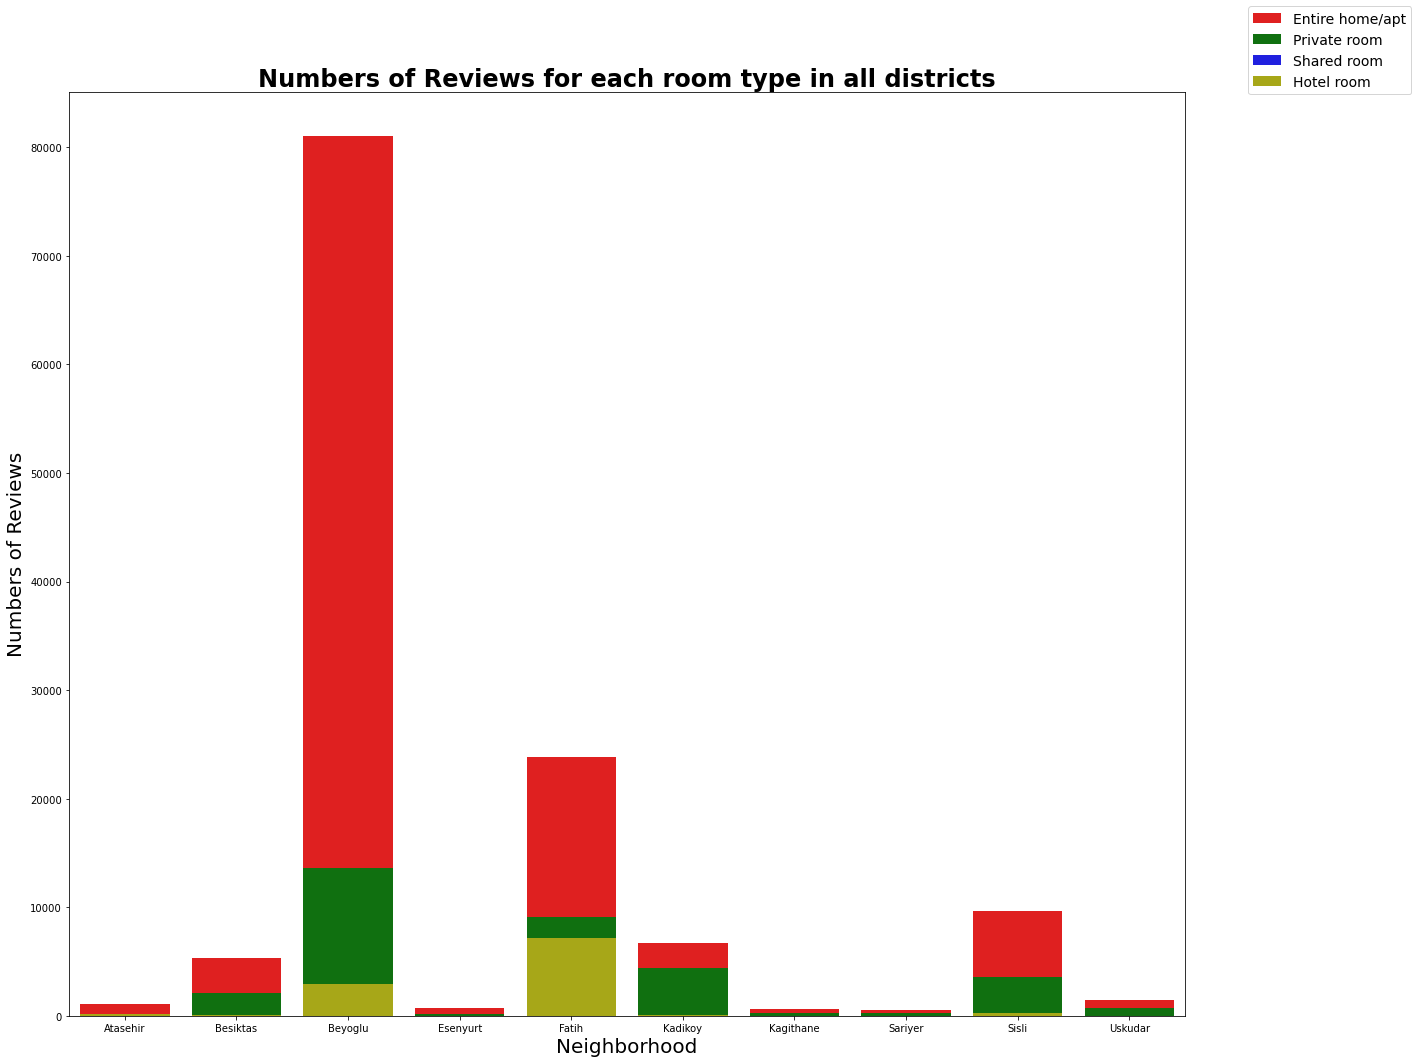

In [162]:
fig, ax = plt.subplots(figsize=(20,17))

ax =sns.barplot(data=review, x="city", y='Entire home/apt',color='r',label = 'Entire home/apt')
ax =sns.barplot(data=review, x="city", y='Private room',color='g',label ='Private room' )
ax =sns.barplot(data=review, x="city", y='Shared room',color='b',label = 'Shared room')
ax =sns.barplot(data=review, x="city", y='Hotel room',color='y', label = 'Hotel room')
ax.set_xlabel('Neighborhood',fontsize=20)
ax.set_ylabel('Numbers of Reviews',fontsize=20)
ax.set_title('Numbers of Reviews for each room type in all districts',fontweight='bold',fontsize=24,)
ax.legend(bbox_to_anchor=(1.05, 1.1), loc=2, fontsize='14')

#### Among the top ten cities with the most number of Airbnbs:
#### The number of Reviews indicates the popularity of the roomtype and neighborhood. 
#### Roomtype: shared room is the least popular, entire home/apt is the most popular.
#### Neighborhood: Sisli is the neighborhood with the most reviews, which means it is really popular. The least popular neighborhood: Kadikoy, Esenyurt, Kagithane


#### 1.3 Host

In [163]:
istb_top_host = istb['host_id'].value_counts()[:10]

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Host IDs')

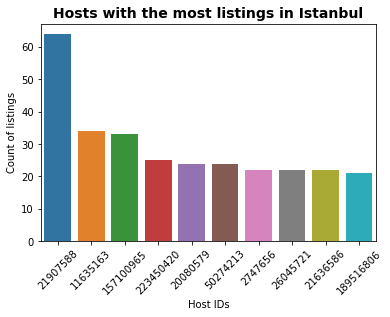

In [164]:
ax = sns.barplot(istb_top_host.index, istb_top_host.values,order=istb_top_host.index)
ax.set_xticklabels(ax.get_xticklabels (),rotation=45)
ax.set_title('Hosts with the most listings in Istanbul',size=14,fontweight='bold')
ax.set_ylabel('Count of listings')
ax.set_xlabel('Host IDs')

In [165]:
x = istb['host_id'].value_counts().nlargest(n=10).index.values
host_219 = istb.loc[istb['host_id'].isin(x),:]
host_219 = istb.loc[istb['host_id'] == 21907588,:]


Text(0.5, 1.0, 'The neighborhood distribution of airbnbs of top 10 hosts in Istanbul')

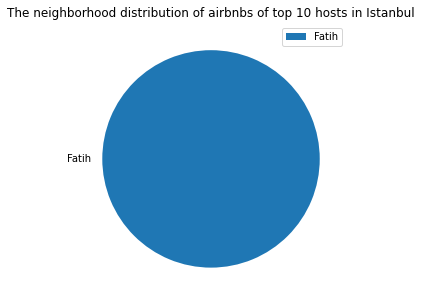

In [166]:
host_n = host_219.groupby(['neighbourhood'])[['neighbourhood']].count()
fix,ax= plt.subplots(figsize = (7,5))
host_n.plot(kind= 'pie', x = 'neighbourhood', ax=ax, subplots = True)
ax.set_ylabel('  ')
ax.set_xlabel('')
plt.legend(bbox_to_anchor=(1, 1))
plt.title('The neighborhood distribution of airbnbs of top 10 hosts in Istanbul')

#### All the top hosts' airbnb rooms are in Fatih

Text(0.5, 1.0, 'The room type distribution of airbnbs of top 10 hosts in Istanbul')

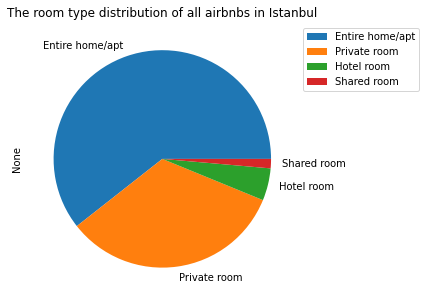

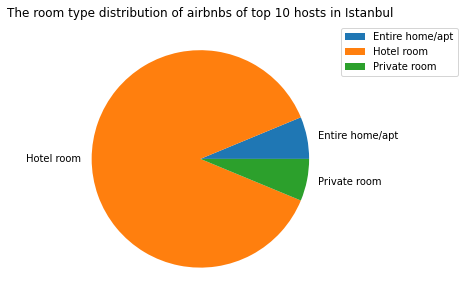

In [167]:
CountStatus = pd.value_counts(istb['room_type'].values, sort=True)
CountStatus.plot.pie(figsize = (7,5))
host_is = host_219.groupby(['room_type'])[['room_type']].count()
plt.legend(bbox_to_anchor = (1,1))
plt.title('The room type distribution of all airbnbs in Istanbul')
fix,ax = plt.subplots(figsize = (7,5))
host_is.plot(kind = 'pie',x = "room_type", ax=ax, subplots = True)
ax.set_ylabel('  ')
ax.set_xlabel('')
plt.legend(bbox_to_anchor = (1,1))
plt.title('The room type distribution of airbnbs of top 10 hosts in Istanbul')


####  The top hosts tends to have more hotel rooms. 


#### 1.4 Prices

Text(0.5, 1.0, 'Prices for each room type in all districts')

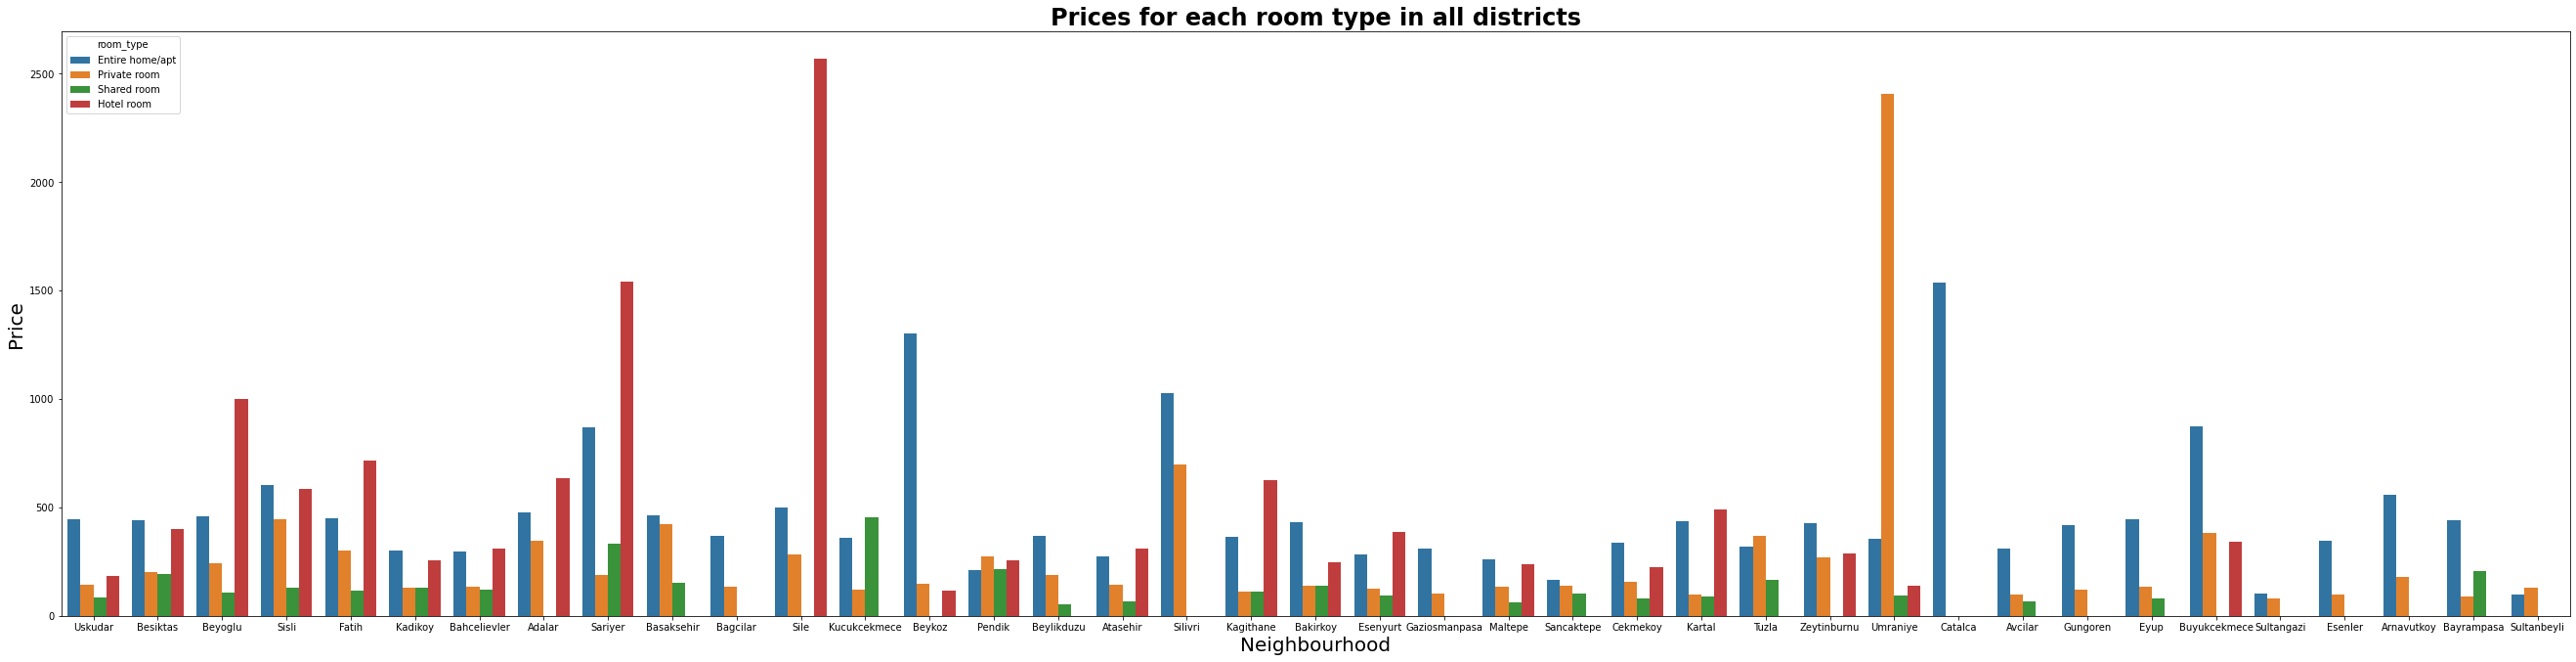

In [168]:
fig, ax = plt.subplots(figsize=(46,11))
ax =sns.barplot(data=istb, x="neighbourhood", y ='price', hue="room_type",ci= None)
ax.set_xlabel('Neighbourhood',fontsize=20)
ax.set_ylabel('Price',fontsize=20)
ax.set_title('Prices for each room type in all districts',fontweight='bold',fontsize=24)


#### The prices of Hotel room in Uskudar is largely higher than other rooms

Text(0.5, 1.0, 'Density and distribution of prices for each room type')

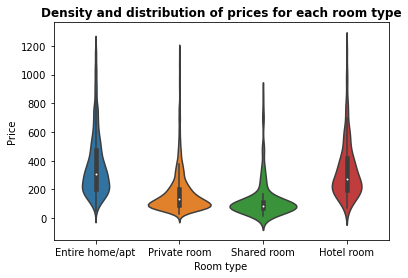

In [169]:
 
ax = sns.violinplot(data=istb[istb.price < 1200] ,x='room_type',y='price')

ax.set_xlabel('Room type')
ax.set_ylabel('Price')
ax.set_title('Density and distribution of prices for each room type',fontweight='bold')

### 2. Descriptive Data Analysis

#### 2.1Data Overview


In [170]:
istb = pd.read_csv('https://raw.githubusercontent.com/AmysnL/data-bootcamp-final-project/main/Istanbul.csv')

In [171]:
istb.describe()

id       host_id  neighbourhood_group      latitude  \
count  2.372800e+04  2.372800e+04                  0.0  23728.000000   
mean   2.913711e+07  1.493973e+08                  NaN     41.028416   
std    1.305964e+07  1.155452e+08                  NaN      0.045713   
min    4.826000e+03  6.603000e+03                  NaN     40.813960   
25%    2.101860e+07  3.285440e+07                  NaN     41.005120   
50%    3.398637e+07  1.477727e+08                  NaN     41.031850   
75%    3.965902e+07  2.588145e+08                  NaN     41.048530   
max    4.397093e+07  3.522041e+08                  NaN     41.479030   

          longitude         price  minimum_nights  number_of_reviews  \
count  23728.000000  23728.000000    23728.000000       23728.000000   
mean      28.982111    484.643248        4.525202           7.870828   
std        0.127503   1973.884093       27.614191          23.229127   
min       28.019010      0.000000        1.000000           0.000000   
25%       28.973210    137.000000        1.000000           0.000000   
50%       28.983485    247.000000        1.000000           0.000000   
75%       29.020050    446.000000        3.000000           4.000000   
max       29.907780  76922.000000     1125.000000         345.000000   

       reviews_per_month  calculated_host_listings_count  availability_365  
count       11353.000000                    23728.000000      23728.000000  
mean            0.710177                        5.861767        227.709921  
std             0.902913                       16.535368        146.607077  
min             0.010000                        1.000000          0.000000  
25%             0.130000                        1.000000         89.000000  
50%             0.330000                        2.000000        302.000000  
75%             0.950000                        5.000000        365.000000  
max             9.200000                      176.000000        365.000000

In [172]:
istb.isnull().sum()

id                                    0
name                                 54
host_id                               0
host_name                             1
neighbourhood_group               23728
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       12375
reviews_per_month                 12375
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [173]:
istb.drop(columns= ['neighbourhood_group'], axis = 1, inplace = True)
istb

id                                               name    host_id  \
0          4826                                          The Place       6603   
1         20815                  The Bosphorus from The Comfy Hill      78838   
2         27271                    LOVELY APT. IN PERFECT LOCATION     117026   
3         28277                      Duplex Apartment with Terrace     121607   
4         28318                    Cosy home overlooking Bosphorus     121721   
...         ...                                                ...        ...   
23723  43963636                                 Avcılarda özel oda  297895734   
23724  43966333  1+1 LUXURY RESIDENCEIN MASLAK HYGIENE CERTIFIC...   69089629   
23725  43966442                               The Rooms In Beyoğlu  286090194   
23726  43967082                          Istanbul dream apartement  288314755   
23727  43970934    Şile sahilinin eşşiz manzarası sizleri bekliyor  352204054   

      host_name neighbourhood  latitude  longitude        room_type  price  \
0          Kaan       Uskudar  41.05650   29.05367  Entire home/apt    720   
1        Gülder      Besiktas  41.06984   29.04545  Entire home/apt    816   
2         Mutlu       Beyoglu  41.03254   28.98153  Entire home/apt    233   
3          Alen         Sisli  41.04471   28.98567       Hotel room    761   
4         Aydin       Sariyer  41.09048   29.05559  Entire home/apt    823   
...         ...           ...       ...        ...              ...    ...   
23723    Aykhan       Avcilar  40.97870   28.72668     Private room    171   
23724     Metin         Sisli  41.11798   29.00886  Entire home/apt    597   
23725  Seyfulla       Beyoglu  41.03839   28.98831     Private room    144   
23726      Adil      Esenyurt  41.01065   28.67427  Entire home/apt    603   
23727     Engin          Sile  41.17426   29.60997     Private room    103   

       minimum_nights  number_of_reviews last_review  reviews_per_month  \
0                   1                  1  2009-06-01               0.01   
1                 365                 41  2018-11-07               0.33   
2                  30                 13  2018-05-04               0.19   
3                   3                  0         NaN                NaN   
4                   3                  0         NaN                NaN   
...               ...                ...         ...                ...   
23723               1                  0         NaN                NaN   
23724               1                  0         NaN                NaN   
23725               1                  0         NaN                NaN   
23726               2                  0         NaN                NaN   
23727               1                  0         NaN                NaN   

       calculated_host_listings_count  availability_365  
0                                   1               365  
1                                   2               279  
2                                   1               289  
3                                  19               365  
4                                   1                88  
...                               ...               ...  
23723                               2               175  
23724                              15               363  
23725                               7               210  
23726                               1                90  
23727                               1               363  

[23728 rows x 15 columns]

#### 2.2 Descriptive Data Analysis

In [174]:
# encode str 
en_istb = istb.copy()
en_istb['neighbourhood'] = en_istb['neighbourhood'].astype('category').cat.codes
en_istb['room_type'] = en_istb['room_type'].astype("category").cat.codes
mean = en_istb['reviews_per_month'].mean()
en_istb['reviews_per_month'].fillna(mean, inplace=True) ####
en_istb['log_price'] = np.log(en_istb.price+1)  #####
en_istb = en_istb.drop(columns=['id' ,'host_id','price']) # delete price column
en_istb.isnull().sum()

name                                 54
host_name                             1
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
minimum_nights                        0
number_of_reviews                     0
last_review                       12375
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
log_price                             0
dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Price - Log')

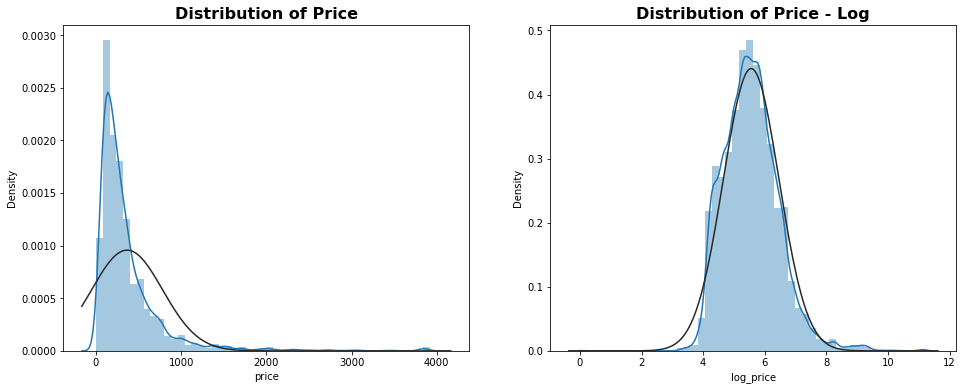

In [175]:
fig,ax = plt.subplots(1,2,figsize = (16,6))
sns.distplot(istb['price'].loc[istb['price'] <= 4000], fit = norm, ax = ax[0])
ax[0].set_title("Distribution of Price", size = 16,weight = 'bold')
sns.distplot(en_istb['log_price'],fit=norm , ax = ax[1])
ax[1].set_title("Distribution of Price - Log", size = 16,weight = 'bold')

#### The log price distribution is approximately a normal distribution of a mean of approximately 5.5

#### 2.3 Correlation

In [176]:
listings_istb = istb

In [177]:
# Change data type
listings_price_istb = listings_istb[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365','latitude','longitude']]
listings_price_istb[:5]

price  minimum_nights  number_of_reviews  reviews_per_month  \
0    720               1                  1               0.01   
1    816             365                 41               0.33   
2    233              30                 13               0.19   
3    761               3                  0                NaN   
4    823               3                  0                NaN   

   calculated_host_listings_count  availability_365  latitude  longitude  
0                               1               365  41.05650   29.05367  
1                               2               279  41.06984   29.04545  
2                               1               289  41.03254   28.98153  
3                              19               365  41.04471   28.98567  
4                               1                88  41.09048   29.05559

#### This is the correlation matrix showing relationships between different variables. 
#### This will help the host to improve decisions.

Text(0.5, 1.0, 'Correlation Matrix')

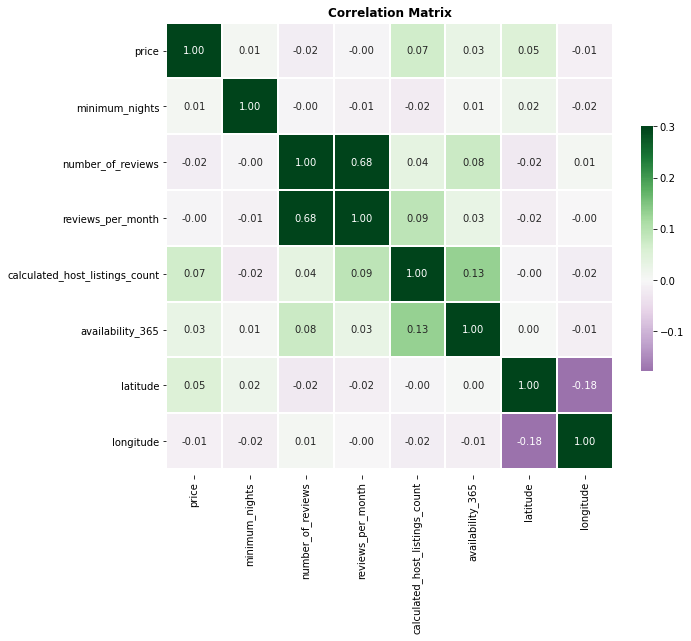

In [178]:
plt.figure(figsize=(10,10))
palette = sns.diverging_palette(20, 220, n=256)
corr=listings_price_istb.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt=".2f", cmap="PRGn", vmax=.3, center=0,square=True, linewidths=1, cbar_kws={"shrink": .45}).set(ylim=(8.1,0))
plt.title("Correlation Matrix",size=12, weight='bold')

## 3. Regression

#### 3.1 Linear Regression

In [179]:
reg_price = smf.ols('price ~ room_type + availability_365 + number_of_reviews + calculated_host_listings_count + reviews_per_month'
                    ,data=istb).fit()
print(reg_price.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     10.16
Date:                Fri, 18 Dec 2020   Prob (F-statistic):           9.72e-13
Time:                        10:29:12   Log-Likelihood:            -1.0027e+05
No. Observations:               11353   AIC:                         2.006e+05
Df Residuals:                   11345   BIC:                         2.006e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

#### From the regressino result above, we can see that room_type[T.Hotel room] , availability_365, calculated_host_listings_count all contributed positively to the price. 
#### room_type[T.Private room], room_type[T.Shared room], number_of_reviews , reviews_per_month have negative contribution.

#### 3.2 Log

In [180]:
reg_logprice = smf.ols('log_price ~ neighbourhood +room_type + availability_365 + number_of_reviews + calculated_host_listings_count + reviews_per_month'
                       ,data= en_sh).fit()
print(reg_logprice.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     663.5
Date:                Fri, 18 Dec 2020   Prob (F-statistic):               0.00
Time:                        10:29:12   Log-Likelihood:                -20360.
No. Observations:               18971   AIC:                         4.073e+04
Df Residuals:                   18964   BIC:                         4.079e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

### From the regression result above, we can see that neighbourhood, room_type, availability_365, number_of_reviews, calculated_host_listings_count, and reviews_per_month, all negatively contribute to Price.
### Since the P value of neighbourhood is greater than 5%, its impact on price is not significant.

## 4. Machine Learning

In [181]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(en_istb[['room_type']].values, en_istb[['log_price']].values,
                                                        test_size=0.25, random_state=0)


#### (1) KNN

In [288]:
from sklearn.neighbors import KNeighborsRegressor as knn
from sklearn.model_selection import cross_val_score
scores = pd.Series(dtype='float')
for i in range(20,1200,40):
    scores[str(i)] = cross_val_score(knn(n_neighbors=i),X_train1, y_train1,cv=5).mean()
indx = scores.idxmax()

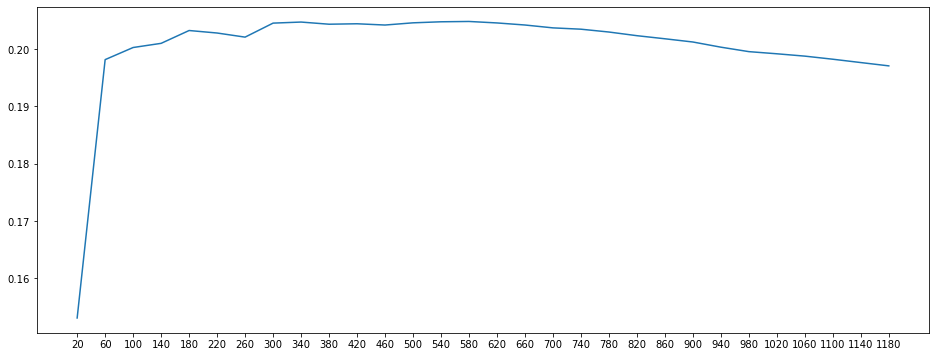

In [183]:
fig,ax = plt.subplots(figsize=(16,6))
plt.plot(scores.index,scores.values)

In [184]:
skl_knn = knn(n_neighbors = int(indx)).fit(X_train1, y_train1)  #####
knn_score1 = skl_knn.score(X_test1,y_test1)
print(knn_score1)

0.20994304368246441


#### (2) Random Forest

In [185]:
from sklearn.ensemble import RandomForestRegressor as rf
cross_val_score(rf(n_estimators = 100, max_depth = 3), X_train1, y_train1.ravel(), cv=5).mean()


0.20514967801414014

In [186]:
cv_scores = pd.DataFrame()
for i in range (1,25):
    cv_scores.loc[i,'rf'] = cross_val_score(rf(n_estimators = 100, max_depth = i), X_train1, y_train1.ravel(),cv=5).mean()

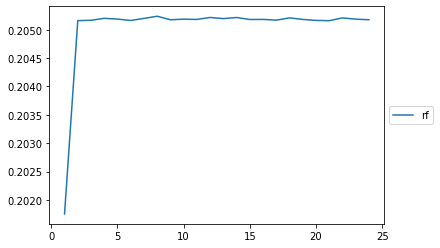

In [187]:
ax = cv_scores.plot()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [188]:
indx = scores.idxmax()
skl_rf = rf(n_estimators=100,max_depth=int(indx)).fit(X_train1, y_train1.ravel())
rf_score1 = skl_rf.score(X_test1,y_test1)
print(rf_score1)

0.21040392141680886


In [189]:
score_table = pd.DataFrame({'K Nearest Neighbors':[knn_score1],'Random Forest':[rf_score1]})
score_table = score_table.T
score_table.columns = ['Score']
score_table

Score
K Nearest Neighbors  0.209943
Random Forest        0.210404

#### According to the table above, we can use Random Forest as the score for this model for log_price, which is higher than KNN.
#### However, the score of KNN and Random Forest are relatively low. It could be due to some intangible features such as 
#### the room quality, service friendliness, and the environment, etc

# Singapore

In [190]:
sp = pd.read_csv('https://raw.githubusercontent.com/AmysnL/data-bootcamp-final-project/main/Singapore.csv')
sp.head()

id                                 name  host_id  host_name  \
0  49091    COZICOMFORT LONG TERM STAY ROOM 2   266763  Francesca   
1  50646      Pleasant Room along Bukit Timah   227796    Sujatha   
2  56334                          COZICOMFORT   266763  Francesca   
3  71609  Ensuite Room (Room 1 & 2) near EXPO   367042    Belinda   
4  71896      B&B  Room 1 near Airport & EXPO   367042    Belinda   

  neighbourhood_group neighbourhood  latitude  longitude     room_type  price  \
0        North Region     Woodlands   1.44255  103.79580  Private room     83   
1      Central Region   Bukit Timah   1.33235  103.78521  Private room     81   
2        North Region     Woodlands   1.44246  103.79667  Private room     69   
3         East Region      Tampines   1.34541  103.95712  Private room    206   
4         East Region      Tampines   1.34567  103.95963  Private room     94   

   minimum_nights  number_of_reviews last_review  reviews_per_month  \
0             180                  1  2013-10-21               0.01   
1              90                 18  2014-12-26               0.28   
2               6                 20  2015-10-01               0.20   
3               1                 14  2019-08-11               0.15   
4               1                 22  2019-07-28               0.22   

   calculated_host_listings_count  availability_365  
0                               2               365  
1                               1               365  
2                               2               365  
3                               9               353  
4                               9               355

 #### 1.1 Location and availabiity Overview

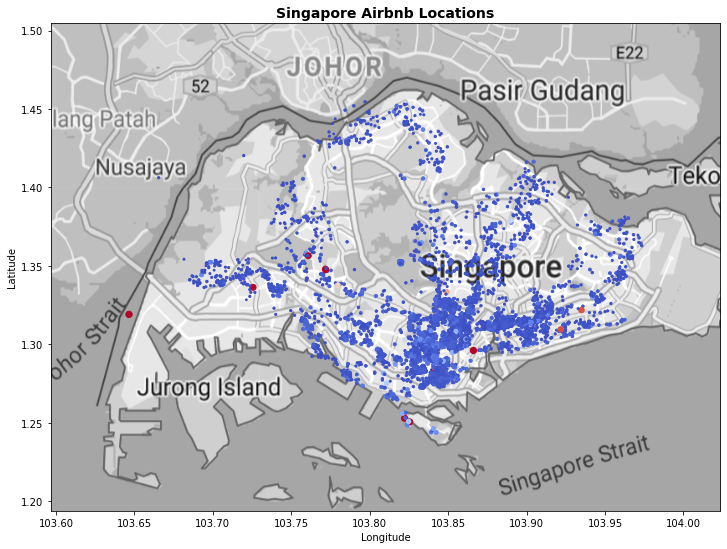

In [191]:
mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline
fig,ax = location('Singapore', sp,0.4,1.8,12,12)
xl,xh,yl,yh = map_range(sp)
sp_map = import_img('https://github.com/570558305/dmafinal/blob/main/sp.png?raw=true')#po

bw_img = sp_map.convert('L')

ax.imshow(bw_img,extent=[xl-0.19 ,xh+0.27  ,yl-0.24 ,yh +0.17 ], cmap='gray')

#### Note that the colder the color, the cheaper the price, the red spot shows that the prices are really high.
#### The scatter plot here shows that the distribution of Airbnbs located in Singapore. 

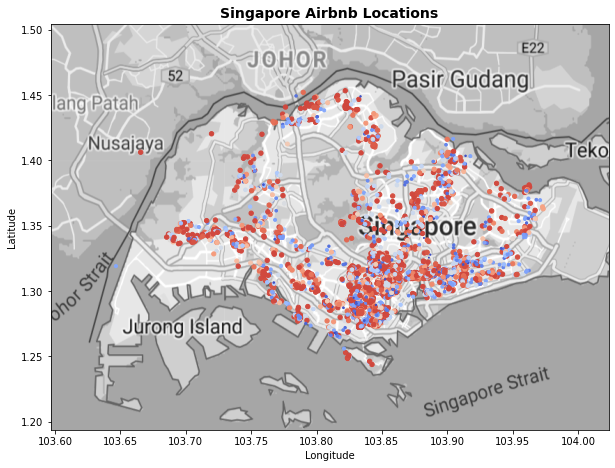

In [192]:
fig,ax = scatter_('Singapore', sp,0.5,0.92,10,10)
xl,xh,yl,yh = map_range(sp)
sp_map = import_img('https://github.com/570558305/dmafinal/blob/main/sp.png?raw=true')
bw_img = sp_map.convert('L')
#plt.imshow(bw_img, cmap = 'gray')

ax.imshow(bw_img,extent=[xl-0.19 ,xh+0.27  ,yl-0.24 ,yh +0.17 ], cmap='gray')



####  The scatter plot shows the availability of airbnbs in Singapore, the warmer the color, there are more available rooms at the airbnb represented by the spot, vice versa.

 #### 1.2 Neighborhood

##### 1.21 The distribution of Airbnbs in each district

In [193]:
pd.DataFrame(sp['neighbourhood_group'].unique())

0
0       North Region
1     Central Region
2        East Region
3        West Region
4  North-East Region

<AxesSubplot:>

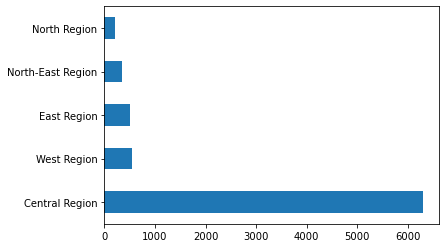

In [194]:
CountStatus = pd.value_counts(sp['neighbourhood_group'].values, sort=True)
CountStatus.plot.barh()

#### Central Region has the most airbnbs located. North Region has the least airbnbs.

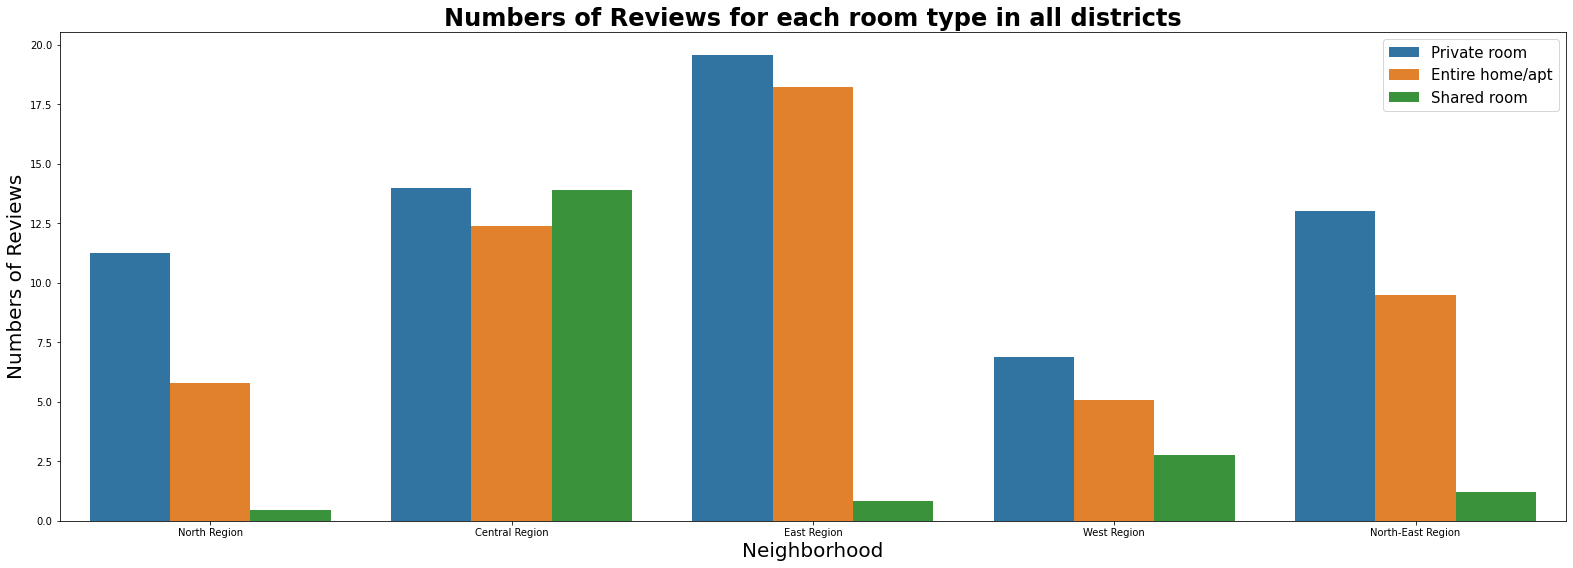

In [195]:
fig, ax = plt.subplots(figsize=(27,9))
ax =sns.barplot(data=sp, x="neighbourhood_group", y ='number_of_reviews', hue="room_type",ci=None )

ax.set_xlabel('Neighborhood',fontsize=20)
ax.set_ylabel('Numbers of Reviews',fontsize=20)
ax.set_title('Numbers of Reviews for each room type in all districts',fontweight='bold',fontsize=24)
ax.legend(fontsize = 15)

#### The number of Reviews indicates the popularity of the rooms and neighborhood. 
#### Private room is the most popular in all of the neighborhood groups.
#### For most of the group, the popularity is: Private > Entire > Shared.
#### Central region is very special. The review of shared room is almost the same with that of private room.

#### 1.3 Host

In [196]:
top_host_sp = sp['host_id'].value_counts()[:10]
top_host_sp

66406177     274
8492007      203
209913841    157
29420853     141
31464513     114
219550151    113
2413412      112
108773366    109
23722617      84
8948251       83
Name: host_id, dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Host IDs')

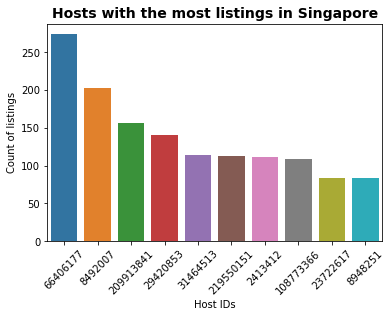

In [197]:
ax = sns.barplot(top_host_sp.index, top_host_sp.values,order=top_host_sp.index)
ax.set_xticklabels(ax.get_xticklabels (),rotation=45)
ax.set_title('Hosts with the most listings in Singapore',size=14,fontweight='bold')
ax.set_ylabel('Count of listings')
ax.set_xlabel('Host IDs')

In [198]:
x = istb['host_id'].value_counts().nlargest(n=10).index.values
host_664 = sp.loc[sp['host_id'].isin(x),:]
host_664 = sp.loc[sp['host_id'] == 66406177,:]

Text(0.5, 1.0, "The neighbourhood distribution of top 10 hosts' airbnbs in Singapore")

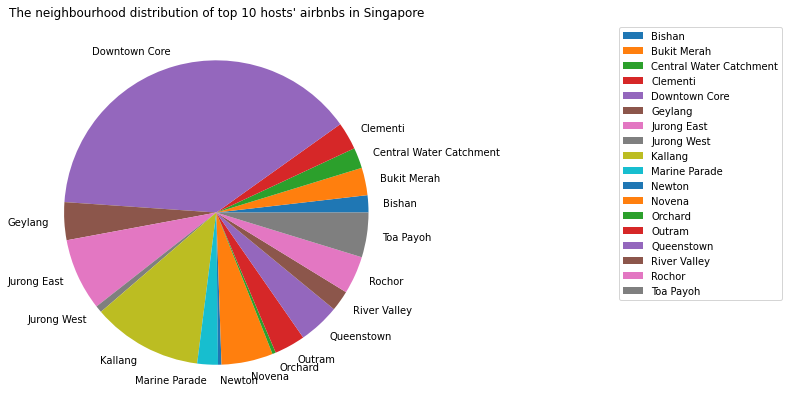

In [199]:
host_n = host_664.groupby(['neighbourhood'])[['neighbourhood']].count()
fix,ax = plt.subplots(figsize = (7,7))
host_n.plot(kind='pie',x='neighbourhood',ax=ax,subplots=True)
ax.set_ylabel('  ')
ax.set_xlabel('')
plt.legend(bbox_to_anchor=(2, 1))
plt.title("The neighbourhood distribution of top 10 hosts' airbnbs in Singapore")

Text(0.5, 1.0, 'The room type distribution of airbnbs of top 10 host in Singapore')

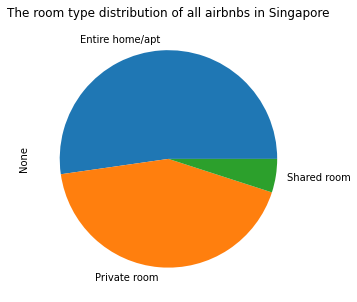

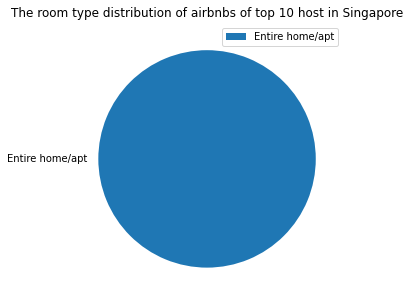

In [200]:
CountStatus = pd.value_counts(sp['room_type'].values, sort=True)
CountStatus.plot.pie(figsize = (7,5))
plt.title('The room type distribution of all airbnbs in Singapore')
x =sp["host_id"].value_counts().nlargest(n=10).index.values
host_664 = sp.loc[sp['host_id'].isin(x) ,:]
host_664 = sp.loc[sp['host_id']==66406177,:]

host_rt = host_664.groupby(['room_type'])[['room_type']].count()
fix,ax = plt.subplots(figsize = (7,5))
host_rt.plot(kind='pie',x='room_type',ax=ax,subplots=True)
ax.set_ylabel('  ')
ax.set_xlabel('')
plt.legend(bbox_to_anchor=(1, 1))
plt.title('The room type distribution of airbnbs of top 10 host in Singapore')

#### All the top 10 hosts listed the room type: entire home/apartment

#### 1.4 Prices

Text(0.5, 1.0, 'Prices for each room type in all districts')

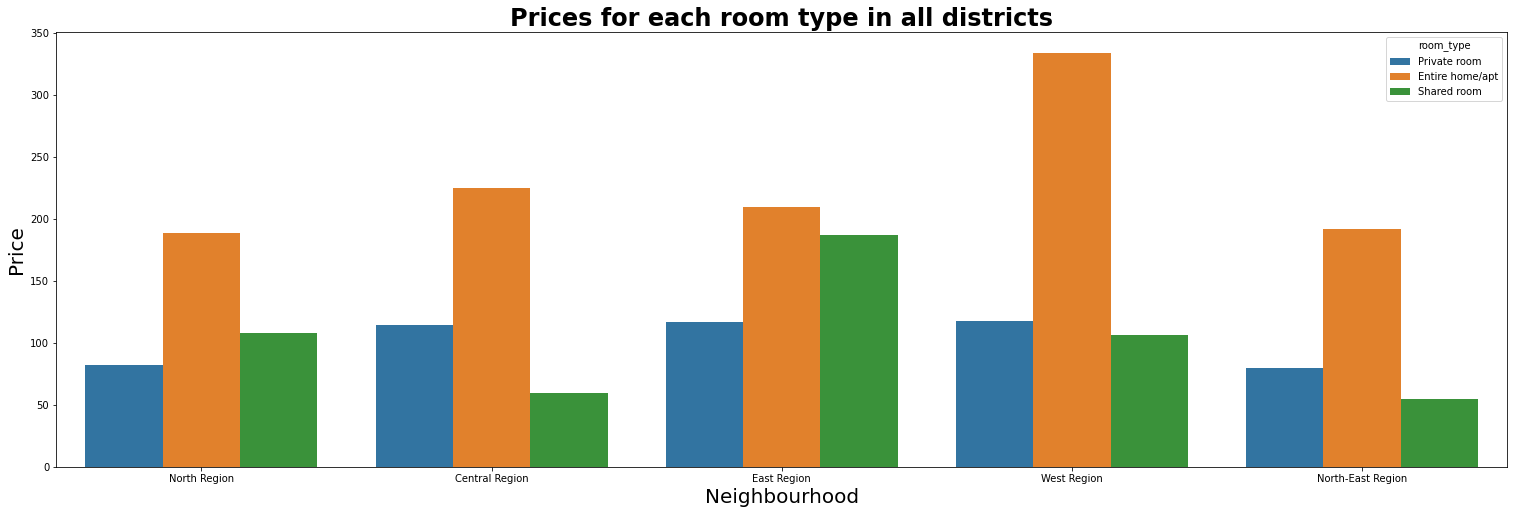

In [201]:
fig, ax = plt.subplots(figsize=(26,8))
ax =sns.barplot(data=sp, x="neighbourhood_group", y ='price', hue="room_type",ci=None)
ax.set_xlabel('Neighbourhood',fontsize=20)
ax.set_ylabel('Price',fontsize=20)
ax.set_title('Prices for each room type in all districts',fontweight='bold',fontsize=24)

Text(0.5, 1.0, 'Density and distribution of prices for each room type')

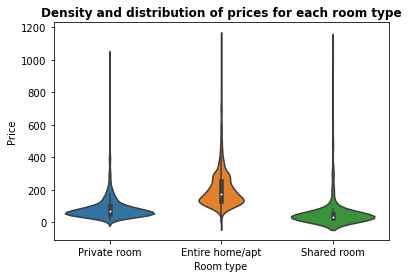

In [202]:
ax = sns.violinplot(data=sp[sp.price < 1200] ,x='room_type',y='price')

ax.set_xlabel('Room type')
ax.set_ylabel('Price')
ax.set_title('Density and distribution of prices for each room type',fontweight='bold')

### 2. Descriptive Data Analysis

#### 2.1Data Overview

In [203]:
sp.describe()

id       host_id     latitude    longitude         price  \
count  7.907000e+03  7.907000e+03  7907.000000  7907.000000   7907.000000   
mean   2.338862e+07  9.114481e+07     1.314192   103.848787    169.332996   
std    1.016416e+07  8.190910e+07     0.030577     0.043675    340.187599   
min    4.909100e+04  2.366600e+04     1.243870   103.646560      0.000000   
25%    1.582180e+07  2.305808e+07     1.295795   103.835825     65.000000   
50%    2.470627e+07  6.344891e+07     1.311030   103.849410    124.000000   
75%    3.234850e+07  1.553811e+08     1.322110   103.872535    199.000000   
max    3.811276e+07  2.885676e+08     1.454590   103.973420  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count     7907.000000        7907.000000        5149.000000   
mean        17.510054          12.807386           1.043669   
std         42.094616          29.707746           1.285851   
min          1.000000           0.000000           0.010000   
25%          1.000000           0.000000           0.180000   
50%          3.000000           2.000000           0.550000   
75%         10.000000          10.000000           1.370000   
max       1000.000000         323.000000          13.000000   

       calculated_host_listings_count  availability_365  
count                     7907.000000       7907.000000  
mean                        40.607689        208.726318  
std                         65.135253        146.120034  
min                          1.000000          0.000000  
25%                          2.000000         54.000000  
50%                          9.000000        260.000000  
75%                         48.000000        355.000000  
max                        274.000000        365.000000

In [204]:
sp.isnull().sum()

id                                   0
name                                 2
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2758
reviews_per_month                 2758
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [205]:
sp.drop(columns=['last_review','reviews_per_month'],axis=1,inplace=True)
sp

id                                               name    host_id  \
0        49091                  COZICOMFORT LONG TERM STAY ROOM 2     266763   
1        50646                    Pleasant Room along Bukit Timah     227796   
2        56334                                        COZICOMFORT     266763   
3        71609                Ensuite Room (Room 1 & 2) near EXPO     367042   
4        71896                    B&B  Room 1 near Airport & EXPO     367042   
...        ...                                                ...        ...   
7902  38105126  Loft 2 pax near Haw Par / Pasir Panjang. Free ...  278109833   
7903  38108273                         3bedroom luxury at Orchard  238891646   
7904  38109336    [ Farrer Park ] New City Fringe CBD Mins to MRT  281448565   
7905  38110493          Cheap Master Room in Central of Singapore  243835202   
7906  38112762  Amazing room with private bathroom walk to Orc...   28788520   

      host_name neighbourhood_group neighbourhood  latitude  longitude  \
0     Francesca        North Region     Woodlands   1.44255  103.79580   
1       Sujatha      Central Region   Bukit Timah   1.33235  103.78521   
2     Francesca        North Region     Woodlands   1.44246  103.79667   
3       Belinda         East Region      Tampines   1.34541  103.95712   
4       Belinda         East Region      Tampines   1.34567  103.95963   
...         ...                 ...           ...       ...        ...   
7902      Belle      Central Region    Queenstown   1.27973  103.78751   
7903       Neha      Central Region       Tanglin   1.29269  103.82623   
7904      Mindy      Central Region       Kallang   1.31286  103.85996   
7905      Huang      Central Region  River Valley   1.29543  103.83801   
7906    Terence      Central Region  River Valley   1.29672  103.83325   

            room_type  price  minimum_nights  number_of_reviews  \
0        Private room     83             180                  1   
1        Private room     81              90                 18   
2        Private room     69               6                 20   
3        Private room    206               1                 14   
4        Private room     94               1                 22   
...               ...    ...             ...                ...   
7902  Entire home/apt    100               3                  0   
7903  Entire home/apt    550               6                  0   
7904     Private room     58              30                  0   
7905     Private room     56              14                  0   
7906     Private room     65              90                  0   

      calculated_host_listings_count  availability_365  
0                                  2               365  
1                                  1               365  
2                                  2               365  
3                                  9               353  
4                                  9               355  
...                              ...               ...  
7902                              31                61  
7903                              34               365  
7904                               3               173  
7905                               2                30  
7906                               7               365  

[7907 rows x 14 columns]

#### 2.2 Descriptive Data Analysis¶

In [206]:
# encode str 
en_sp = sp.copy()
en_sp['neighbourhood_group'] = en_sp['neighbourhood_group'].astype('category').cat.codes
en_sp['room_type'] = en_sp['room_type'].astype("category").cat.codes
#mean = en_sp['reviews_per_month'].mean()
#en_sp['reviews_per_month'].fillna(mean, inplace=True) ####
en_sp['log_price'] = np.log(en_sp.price+1)  #####
en_sp = en_sp.drop(columns=['id' ,'host_id','price']) # delete price column
en_sp.isnull().sum()

name                              2
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
log_price                         0
dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Price - Log')

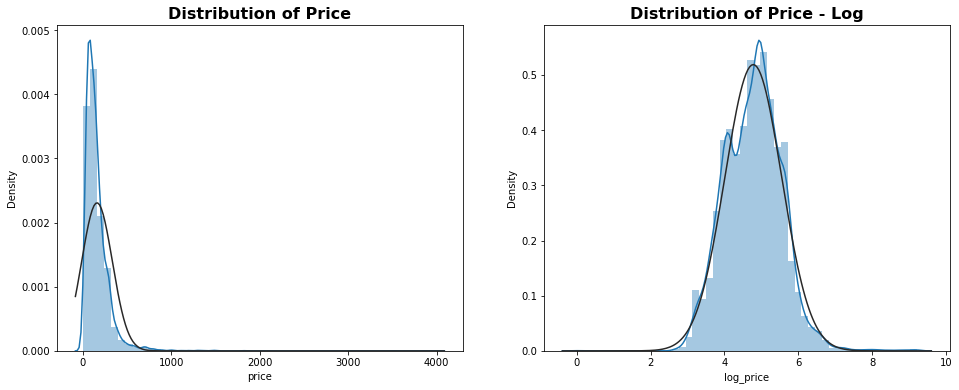

In [207]:
fig,ax = plt.subplots(1,2,figsize = (16,6))
sns.distplot(sp['price'].loc[sp['price'] <= 4000], fit = norm, ax = ax[0])
ax[0].set_title("Distribution of Price", size = 16,weight = 'bold')
sns.distplot(en_sp['log_price'],fit=norm , ax = ax[1])
ax[1].set_title("Distribution of Price - Log", size = 16,weight = 'bold')

#### 2.3 Correlation

In [208]:
listings_sp = sp

In [209]:
# Change data type
listings_price_sp = listings_sp[['price','minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365','latitude','longitude']]
listings_price_sp[:5]

price  minimum_nights  number_of_reviews  calculated_host_listings_count  \
0     83             180                  1                               2   
1     81              90                 18                               1   
2     69               6                 20                               2   
3    206               1                 14                               9   
4     94               1                 22                               9   

   availability_365  latitude  longitude  
0               365   1.44255  103.79580  
1               365   1.33235  103.78521  
2               365   1.44246  103.79667  
3               353   1.34541  103.95712  
4               355   1.34567  103.95963

#### This is the correlation matrix showing relationships between different variables. 
#### This will help the host to improve decisions.

Text(0.5, 1.0, 'Correlation Matrix')

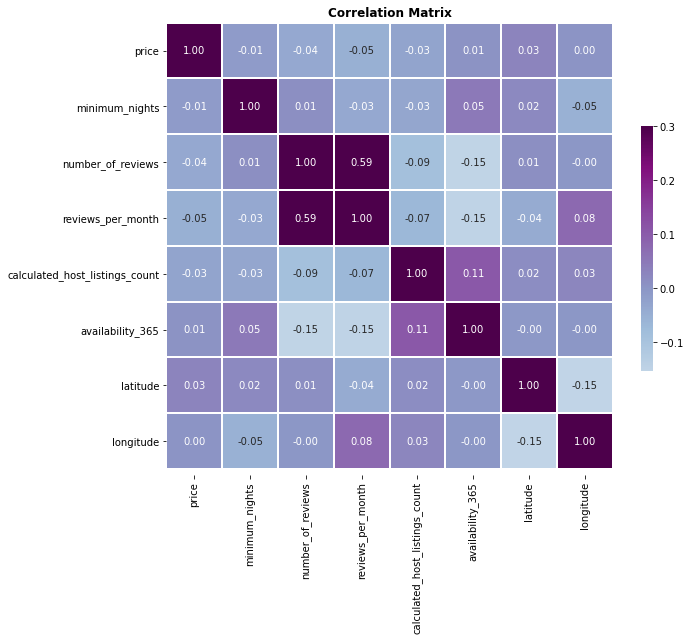

In [210]:
plt.figure(figsize=(10,10))
palette = sns.diverging_palette(20, 220, n=256)
corr=listings_price_df.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt=".2f", cmap="BuPu", vmax=.3, center=0,square=True, linewidths=1, cbar_kws={"shrink": .45}).set(ylim=(8.1,0))
plt.title("Correlation Matrix",size=12, weight='bold')

## 3. Regression

#### 3.1 Linear Regression

In [211]:
reg_price = smf.ols('price ~ neighbourhood_group +room_type + availability_365 + number_of_reviews + calculated_host_listings_count'
                    ,data=sp).fit()
print(reg_price.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     35.74
Date:                Fri, 18 Dec 2020   Prob (F-statistic):           1.39e-62
Time:                        10:32:02   Log-Likelihood:                -57155.
No. Observations:                7907   AIC:                         1.143e+05
Df Residuals:                    7897   BIC:                         1.144e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

#### From the regression result above, we can see that
#### neighbourhood_group[T.East Region], neighbourhood_group[T.West Region], availability_365 contributed positively to price.
#### neighbourhood_group[T.North Region], neighbourhood_group[T.North-East Region], room_type[T.Private room], room_type[T.Shared room], number_of_reviews, calculated_host_listings_count have negative contribution to price.

#### 3.2 Log

In [212]:
reg_logprice = smf.ols('log_price ~ neighbourhood_group +room_type + availability_365 + number_of_reviews + calculated_host_listings_count '
                       ,data= en_sp).fit()
print(reg_logprice.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     1216.
Date:                Fri, 18 Dec 2020   Prob (F-statistic):               0.00
Time:                        10:32:02   Log-Likelihood:                -6884.7
No. Observations:                7907   AIC:                         1.378e+04
Df Residuals:                    7901   BIC:                         1.382e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

### From the regression result above, we can see that neighbourhood_group, room_type, availability_365, number of revies, and calculated host listings count, all negatively contribute to the price.


## 4. Machine Learning

In [213]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(en_sp[['room_type']].values, en_sp[['log_price']].values,
                                                        test_size=0.25, random_state=0)


#### (1) KNN

In [291]:
from sklearn.neighbors import KNeighborsRegressor as knn
from sklearn.model_selection import cross_val_score
scores = pd.Series(dtype='float')
for i in range(20,1200,40):
    scores[str(i)] = cross_val_score(knn(n_neighbors=i),X_train1, y_train1,cv=5).mean()
indx = scores.idxmax()

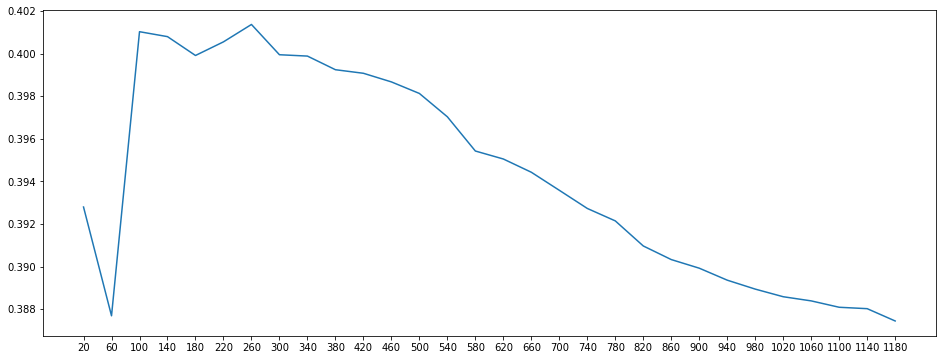

In [215]:
fig,ax = plt.subplots(figsize=(16,6))
plt.plot(scores.index,scores.values)

In [216]:
skl_knn = knn(n_neighbors = int(indx)).fit(X_train1, y_train1)  #####
knn_score1 = skl_knn.score(X_test1,y_test1)
print(knn_score1)

0.44201485921723627


#### (2) Random Forest

In [217]:
from sklearn.ensemble import RandomForestRegressor as rf
cross_val_score(rf(n_estimators = 100, max_depth = 3), X_train1, y_train1.ravel(), cv=5).mean()


0.40466273552100684

In [218]:
cv_scores = pd.DataFrame()
for i in range (1,25):
    cv_scores.loc[i,'rf'] = cross_val_score(rf(n_estimators = 100, max_depth = i), X_train1, y_train1.ravel(),cv=5).mean()

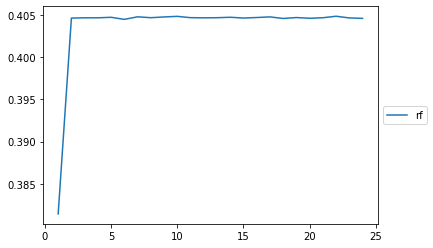

In [219]:
ax = cv_scores.plot()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [220]:
indx = scores.idxmax()
skl_rf = rf(n_estimators=100,max_depth=int(indx)).fit(X_train1, y_train1.ravel())
rf_score1 = skl_rf.score(X_test1,y_test1)
print(rf_score1)

0.44717965377871616


In [221]:
score_table = pd.DataFrame({'K Nearest Neighbors':[knn_score1],'Random Forest':[rf_score1]})
score_table = score_table.T
score_table.columns = ['Score']
score_table

Score
K Nearest Neighbors  0.442015
Random Forest        0.447180

#### According to the table above, we can use Random Forest as the score for this model for log_price, which is higher than KNN.
#### However, the score of KNN and Random Forest are relatively low. It could be due to some intangible features such as 
#### the room quality, service friendliness, and the environment, etc

# Tokyo

 ## 1.1 Data Visualization

#### 1.1 Location and availabiity Overview

In [222]:
tky = pd.read_csv('https://raw.githubusercontent.com/AmysnL/data-bootcamp-final-project/main/Tokyo.csv')
tky.head()

id                                               name  host_id  \
0   35303  La Casa Gaienmae C Harajuku, Omotesando is nearby   151977   
1  197677                          Oshiage Holiday Apartment   964081   
2  289597                  Private apt in central Tokyo #203   341577   
3  370759  Cozy flat #203, local area YET 10 mins to shib...  1573631   
4  700253                  Private apt in central Tokyo #201   341577   

             host_name  neighbourhood_group neighbourhood  latitude  \
0               Miyuki                  NaN    Shibuya Ku  35.67152   
1      Yoshimi & Marek                  NaN     Sumida Ku  35.71721   
2             Hide&Kei                  NaN     Nerima Ku  35.74267   
3  Gilles,Mayumi,Taiki                  NaN   Setagaya Ku  35.66344   
4             Hide&Kei                  NaN     Nerima Ku  35.74264   

   longitude        room_type  price  minimum_nights  number_of_reviews  \
0  139.71203     Private room   4196              28                 18   
1  139.82596  Entire home/apt  10975               3                156   
2  139.65810  Entire home/apt   4196              30                107   
3  139.65593  Entire home/apt   6994              29                 99   
4  139.65832  Entire home/apt   3981              30                101   

  last_review  reviews_per_month  
0  2018-07-28               0.20  
1  2019-05-21               1.65  
2  2019-05-25               1.25  
3  2019-05-07               1.55  
4  2019-05-03               1.24

In [223]:

# drop the extreme for visualization:
tky_v = tky.loc[tky['latitude']>=35,:]
tky_v


id                                               name    host_id  \
0         35303  La Casa Gaienmae C Harajuku, Omotesando is nearby     151977   
1        197677                          Oshiage Holiday Apartment     964081   
2        289597                  Private apt in central Tokyo #203     341577   
3        370759  Cozy flat #203, local area YET 10 mins to shib...    1573631   
4        700253                  Private apt in central Tokyo #201     341577   
...         ...                                                ...        ...   
11461  36083287  1min to station · Skytree/Tatami hotel/new design  235406925   
11462  36083512    Asakusa Wired house 5pax near by UENO/AKIHABARA  267481408   
11463  36084566                                             东京精品民宿  161702799   
11464  36085357  #4 DIRECT ACCESS TO DISNEY IN BUS! 3MIN TO STA...  208189463   
11465  36086604               103号室:立地最高!駅近･買い物便利!改装したばかりの綺麗な和室です｡  254667806   

                 host_name  neighbourhood_group neighbourhood  latitude  \
0                   Miyuki                  NaN    Shibuya Ku  35.67152   
1          Yoshimi & Marek                  NaN     Sumida Ku  35.71721   
2                 Hide&Kei                  NaN     Nerima Ku  35.74267   
3      Gilles,Mayumi,Taiki                  NaN   Setagaya Ku  35.66344   
4                 Hide&Kei                  NaN     Nerima Ku  35.74264   
...                    ...                  ...           ...       ...   
11461            Sayoko佐代子                  NaN     Sumida Ku  35.70862   
11462              Hyongsu                  NaN      Taito Ku  35.72464   
11463                 Yang                  NaN    Toshima Ku  35.73587   
11464              Shotaro                  NaN    Edogawa Ku  35.66255   
11465                  新東明                  NaN   Shinjuku Ku  35.69889   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0      139.71203     Private room   4196              28                 18   
1      139.82596  Entire home/apt  10975               3                156   
2      139.65810  Entire home/apt   4196              30                107   
3      139.65593  Entire home/apt   6994              29                 99   
4      139.65832  Entire home/apt   3981              30                101   
...          ...              ...    ...             ...                ...   
11461  139.81393  Entire home/apt  21951               1                  0   
11462  139.78078  Entire home/apt   7747               1                  0   
11463  139.73397     Private room  56275               1                  0   
11464  139.87236  Entire home/apt   6456               1                  0   
11465  139.70544     Private room   7962               2                  0   

      last_review  reviews_per_month  
0      2018-07-28               0.20  
1      2019-05-21               1.65  
2      2019-05-25               1.25  
3      2019-05-07               1.55  
4      2019-05-03               1.24  
...           ...                ...  
11461         NaN                NaN  
11462         NaN                NaN  
11463         NaN                NaN  
11464         NaN                NaN  
11465         NaN                NaN  

[11425 rows x 14 columns]

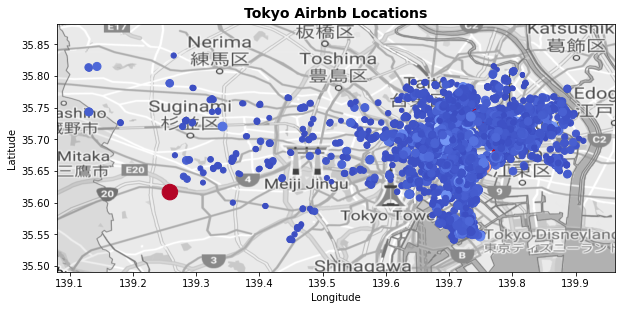

In [224]:
mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline
fig,ax = location('Tokyo', tky_v,0.4,1.8,10,10)
xl,xh,yl,yh = map_range(tky_v)
tky_map = import_img('https://github.com/570558305/dmafinal/blob/main/tkyv.png?raw=true')
bw_img = tky_map.convert('L')

ax.imshow(bw_img,extent=[xl-0.1  ,xh+0.28  ,yl-0.33  ,yh+0.25 ], cmap='gray')

 #### 1.2 Neighborhood

 ##### 1.21 The distribution of Airbnbs in each district

<AxesSubplot:>

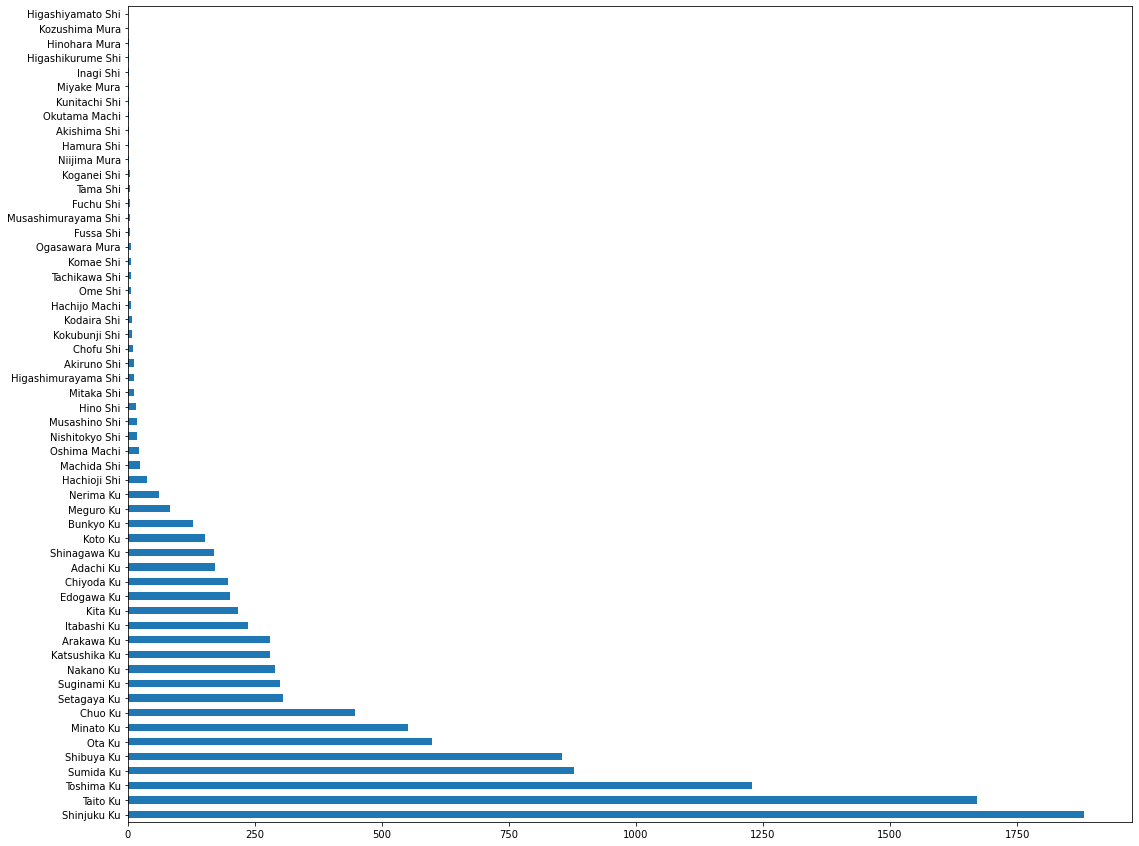

In [225]:
CountStatus = pd.value_counts(tky['neighbourhood'].values, sort=True)
CountStatus.plot.barh(figsize=(18,15))

In [226]:
CountStatus.head(10)

Shinjuku Ku    1882
Taito Ku       1670
Toshima Ku     1228
Sumida Ku       879
Shibuya Ku      854
Ota Ku          598
Minato Ku       551
Chuo Ku         448
Setagaya Ku     305
Suginami Ku     299
dtype: int64

In [227]:
tky['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [228]:
g = ['Shinjuku Ku','Taito Ku','Toshima Ku','Sumida Ku','Shibuya Ku'
    'Ota Ku','Minato Ku','Chuo Ku','Setagaya Ku','Suginami Ku'] #The top ten cities with the most number of airbnbs
tky_10 = tky.loc[tky['neighbourhood'].isin(g)]

Text(0.5, 1.0, 'Numbers of Reviews for each room type in top districts')

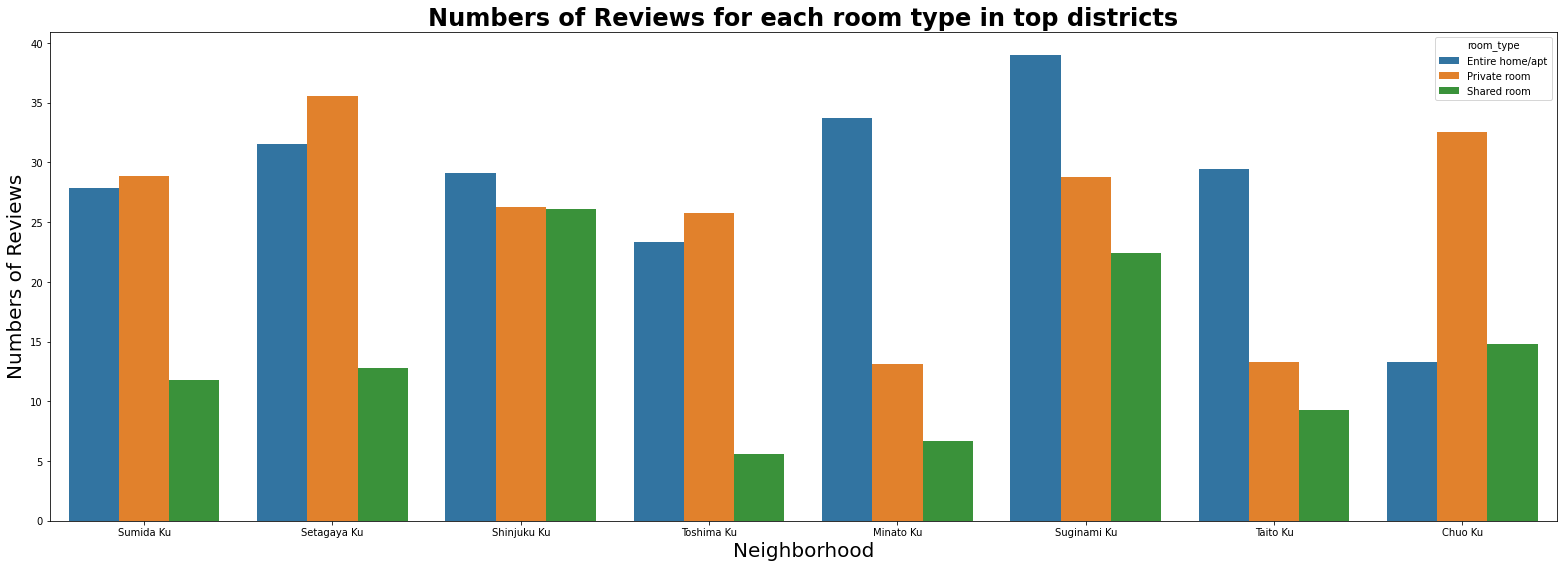

In [229]:
fig, ax = plt.subplots(figsize=(27,9))
ax =sns.barplot(data=tky_10, x="neighbourhood", y ='number_of_reviews', hue="room_type",ci=None )

ax.set_xlabel('Neighborhood',fontsize=20)
ax.set_ylabel('Numbers of Reviews',fontsize=20)
ax.set_title('Numbers of Reviews for each room type in top districts',fontweight='bold',fontsize=24)

#### The number of Reviews indicates the popularity of the rooms and neighborhood.  We can see that the green bar, representing the Shared room, is the least popular in most of the neighbourhoods. Entire home/apt is more popular in Shinjuku Ku, Minato Ku, Suginami Ku, and Taito Ku. Private room is more popular in Sumida Ku, Setagaya Ku, Toshima Ku, and Chuo Ku.

#### 1.3 Host

In [230]:
top_host_t = tky['host_id'].value_counts()[:10]


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Host IDs')

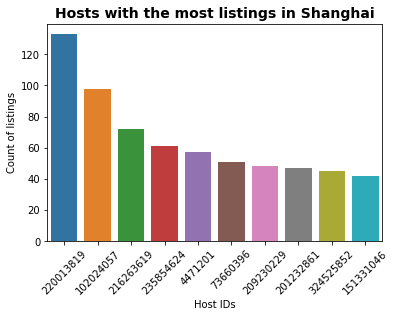

In [231]:
ax = sns.barplot(top_host.index, top_host_t.values,order=top_host.index)
ax.set_xticklabels(ax.get_xticklabels (),rotation=45)
ax.set_title('Hosts with the most listings in Shanghai',size=14,fontweight='bold')
ax.set_ylabel('Count of listings')
ax.set_xlabel('Host IDs')

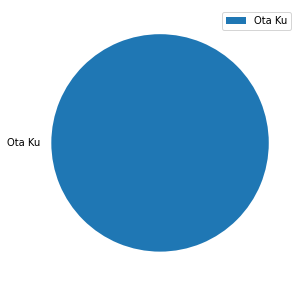

In [232]:
x =tky["host_id"].value_counts().nlargest(n=10).index.values
host_111 = tky.loc[tky['host_id'].isin(x) ,:]
host_111 = tky.loc[tky['host_id']==111043861,:]


host_n = host_111.groupby(['neighbourhood'])[['neighbourhood']].count()
fix,ax = plt.subplots(figsize = (7,5))
host_n.plot(kind='pie',x='neighbourhood',ax=ax,subplots=True)
ax.set_ylabel('  ')
ax.set_xlabel('')
plt.legend(bbox_to_anchor=(1, 1))

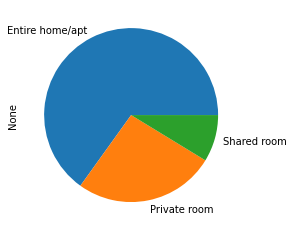

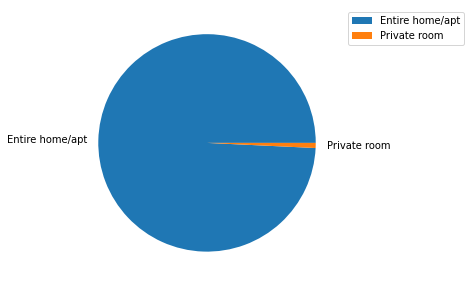

In [233]:
CountStatus = pd.value_counts(tky['room_type'].values, sort=True)
CountStatus.plot.pie()
host_rt = host_111.groupby(['room_type'])[['room_type']].count()
fix,ax = plt.subplots(figsize = (7,5))
host_rt.plot(kind='pie',x='room_type',ax=ax,subplots=True)
ax.set_ylabel('  ')
ax.set_xlabel('')
plt.legend(bbox_to_anchor=(1, 1))


#### 1.4 Prices

Text(0.5, 1.0, 'Prices for each room type in top districts')

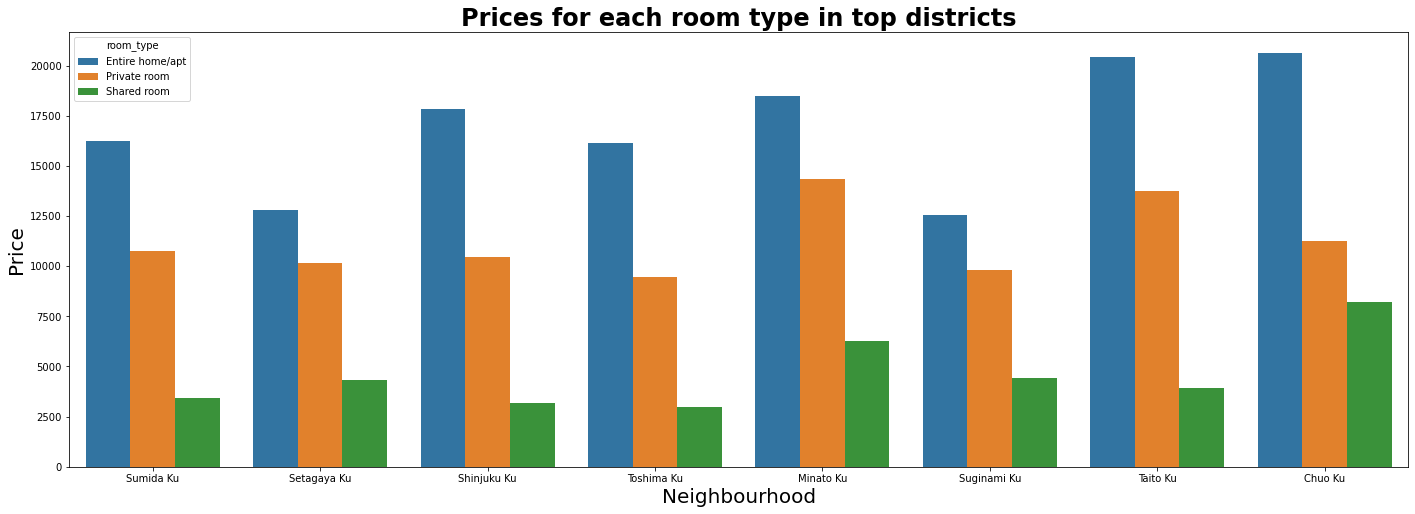

In [234]:
fig, ax = plt.subplots(figsize=(24,8))
ax =sns.barplot(data=tky_10, x="neighbourhood", y ='price', hue="room_type",ci=None)
ax.set_xlabel('Neighbourhood',fontsize=20)
ax.set_ylabel('Price',fontsize=20)
ax.set_title('Prices for each room type in top districts',fontweight='bold',fontsize=24)

Text(0.5, 1.0, 'Density and distribution of prices for each room type')

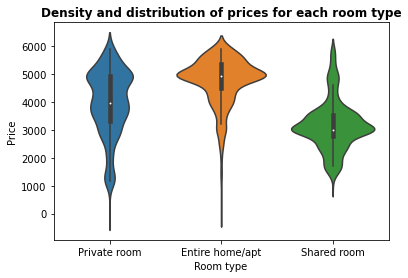

In [235]:
ax = sns.violinplot(data=tky[tky.price < 6000] ,x='room_type',y='price')

ax.set_xlabel('Room type')
ax.set_ylabel('Price')
ax.set_title('Density and distribution of prices for each room type',fontweight='bold')

### 2. Descriptive Data Analysis

#### 2.1Data Overview

In [236]:
tky = pd.read_csv('https://raw.githubusercontent.com/AmysnL/data-bootcamp-final-project/main/Tokyo.csv')
tky.head()

id                                               name  host_id  \
0   35303  La Casa Gaienmae C Harajuku, Omotesando is nearby   151977   
1  197677                          Oshiage Holiday Apartment   964081   
2  289597                  Private apt in central Tokyo #203   341577   
3  370759  Cozy flat #203, local area YET 10 mins to shib...  1573631   
4  700253                  Private apt in central Tokyo #201   341577   

             host_name  neighbourhood_group neighbourhood  latitude  \
0               Miyuki                  NaN    Shibuya Ku  35.67152   
1      Yoshimi & Marek                  NaN     Sumida Ku  35.71721   
2             Hide&Kei                  NaN     Nerima Ku  35.74267   
3  Gilles,Mayumi,Taiki                  NaN   Setagaya Ku  35.66344   
4             Hide&Kei                  NaN     Nerima Ku  35.74264   

   longitude        room_type  price  minimum_nights  number_of_reviews  \
0  139.71203     Private room   4196              28                 18   
1  139.82596  Entire home/apt  10975               3                156   
2  139.65810  Entire home/apt   4196              30                107   
3  139.65593  Entire home/apt   6994              29                 99   
4  139.65832  Entire home/apt   3981              30                101   

  last_review  reviews_per_month  
0  2018-07-28               0.20  
1  2019-05-21               1.65  
2  2019-05-25               1.25  
3  2019-05-07               1.55  
4  2019-05-03               1.24

In [237]:
tky.describe()

id       host_id  neighbourhood_group      latitude  \
count  1.146600e+04  1.146600e+04                  0.0  11466.000000   
mean   2.640545e+07  1.399776e+08                  NaN     35.687159   
std    7.565212e+06  8.064289e+07                  NaN      0.217853   
min    3.530300e+04  1.519770e+05                  NaN     27.072330   
25%    2.215251e+07  5.783171e+07                  NaN     35.679620   
50%    2.841873e+07  1.502326e+08                  NaN     35.701910   
75%    3.222416e+07  2.135896e+08                  NaN     35.724215   
max    3.608660e+07  2.714130e+08                  NaN     35.832430   

          longitude         price  minimum_nights  number_of_reviews  \
count  11466.000000  1.146600e+04    11466.000000       11466.000000   
mean     139.734537  1.498470e+04        3.316239          26.028868   
std        0.092771  3.327345e+04        7.766766          38.455449   
min      139.130020  0.000000e+00        1.000000           0.000000   
25%      139.698975  6.026000e+03        1.000000           2.000000   
50%      139.729165  1.000700e+04        1.000000          12.000000   
75%      139.784270  1.721600e+04        2.000000          32.000000   
max      142.202880  1.000046e+06      180.000000         453.000000   

       reviews_per_month  
count        9789.000000  
mean            2.262540  
std             1.744004  
min             0.040000  
25%             1.000000  
50%             2.060000  
75%             3.170000  
max            51.210000

In [238]:
tky.isnull().sum()

id                         0
name                       0
host_id                    0
host_name                 16
neighbourhood_group    11466
neighbourhood              0
latitude                   0
longitude                  0
room_type                  0
price                      0
minimum_nights             0
number_of_reviews          0
last_review             1677
reviews_per_month       1677
dtype: int64

In [239]:
tky.drop(columns=['neighbourhood_group','last_review','reviews_per_month'],axis=1,inplace=True)
tky

id                                               name    host_id  \
0         35303  La Casa Gaienmae C Harajuku, Omotesando is nearby     151977   
1        197677                          Oshiage Holiday Apartment     964081   
2        289597                  Private apt in central Tokyo #203     341577   
3        370759  Cozy flat #203, local area YET 10 mins to shib...    1573631   
4        700253                  Private apt in central Tokyo #201     341577   
...         ...                                                ...        ...   
11461  36083287  1min to station · Skytree/Tatami hotel/new design  235406925   
11462  36083512    Asakusa Wired house 5pax near by UENO/AKIHABARA  267481408   
11463  36084566                                             东京精品民宿  161702799   
11464  36085357  #4 DIRECT ACCESS TO DISNEY IN BUS! 3MIN TO STA...  208189463   
11465  36086604               103号室:立地最高!駅近･買い物便利!改装したばかりの綺麗な和室です｡  254667806   

                 host_name neighbourhood  latitude  longitude  \
0                   Miyuki    Shibuya Ku  35.67152  139.71203   
1          Yoshimi & Marek     Sumida Ku  35.71721  139.82596   
2                 Hide&Kei     Nerima Ku  35.74267  139.65810   
3      Gilles,Mayumi,Taiki   Setagaya Ku  35.66344  139.65593   
4                 Hide&Kei     Nerima Ku  35.74264  139.65832   
...                    ...           ...       ...        ...   
11461            Sayoko佐代子     Sumida Ku  35.70862  139.81393   
11462              Hyongsu      Taito Ku  35.72464  139.78078   
11463                 Yang    Toshima Ku  35.73587  139.73397   
11464              Shotaro    Edogawa Ku  35.66255  139.87236   
11465                  新東明   Shinjuku Ku  35.69889  139.70544   

             room_type  price  minimum_nights  number_of_reviews  
0         Private room   4196              28                 18  
1      Entire home/apt  10975               3                156  
2      Entire home/apt   4196              30                107  
3      Entire home/apt   6994              29                 99  
4      Entire home/apt   3981              30                101  
...                ...    ...             ...                ...  
11461  Entire home/apt  21951               1                  0  
11462  Entire home/apt   7747               1                  0  
11463     Private room  56275               1                  0  
11464  Entire home/apt   6456               1                  0  
11465     Private room   7962               2                  0  

[11466 rows x 11 columns]

#### 2.2 Descriptive Data Analysis¶

In [240]:
en_t = tky.copy()
en_t['neighbourhood'] = en_t['neighbourhood'].astype('category').cat.codes
en_t['room_type'] = en_t['room_type'].astype("category").cat.codes
#mean = en_t['reviews_per_month'].mean()
#en_t['reviews_per_month'].fillna(mean, inplace=True) ####
en_t['log_price'] = np.log(en_t.price+1)  #####
en_t = en_t.drop(columns=['id' ,'host_id','price']) # delete price column
en_t.isnull().sum()

name                  0
host_name            16
neighbourhood         0
latitude              0
longitude             0
room_type             0
minimum_nights        0
number_of_reviews     0
log_price             0
dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Price - Log')

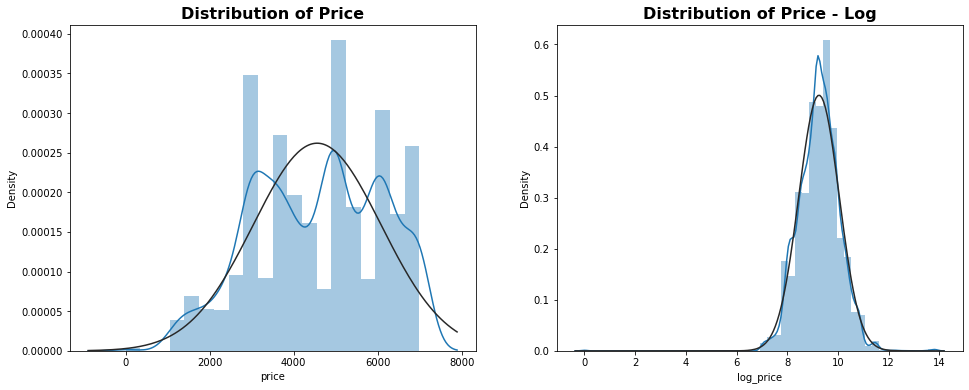

In [241]:
fig,ax = plt.subplots(1,2,figsize = (16,6))
sns.distplot(tky['price'].loc[tky['price'] <= 7000], fit = norm, ax = ax[0])
ax[0].set_title("Distribution of Price", size = 16,weight = 'bold')
sns.distplot(en_t['log_price'],fit=norm , ax = ax[1])
ax[1].set_title("Distribution of Price - Log", size = 16,weight = 'bold')

#### the log price distribution is approaximately a normal distribution of mean of 9

#### 2.3 Correlation

In [242]:
listings_t = tky

In [243]:
# Change data type
listings_price_t = listings_t[['price','minimum_nights','number_of_reviews','latitude','longitude']]
listings_price_t[:5]

price  minimum_nights  number_of_reviews  latitude  longitude
0   4196              28                 18  35.67152  139.71203
1  10975               3                156  35.71721  139.82596
2   4196              30                107  35.74267  139.65810
3   6994              29                 99  35.66344  139.65593
4   3981              30                101  35.74264  139.65832

#### This is the correlation matrix showing relationships between different variables. 
#### This will help the host to improve decisions.

Text(0.5, 1.0, 'Correlation Matrix')

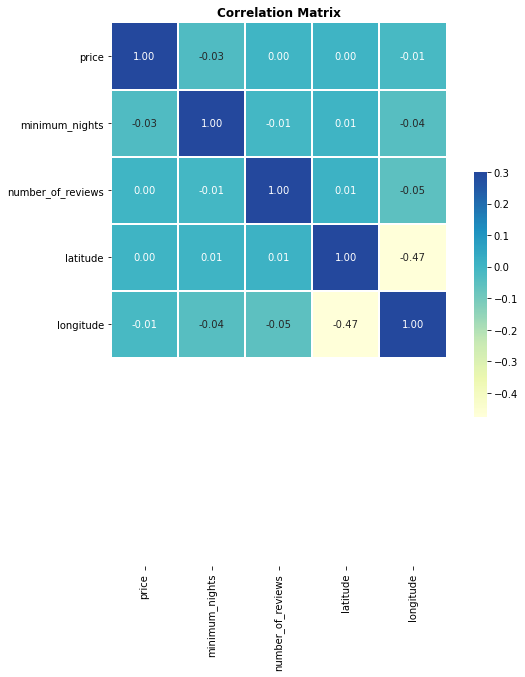

In [244]:
plt.figure(figsize=(10,10))
palette = sns.diverging_palette(20, 220, n=256)
corr=listings_price_t.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt=".2f", cmap="YlGnBu", vmax=.3, center=0,square=True, linewidths=1, cbar_kws={"shrink": .45}).set(ylim=(8.1,0))
plt.title("Correlation Matrix",size=12, weight='bold')

## 3. Regression

#### 3.1 Linear Regression

In [245]:
reg_price = smf.ols('price ~ room_type  + number_of_reviews '
                    ,data=tky).fit()
print(reg_price.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     75.92
Date:                Fri, 18 Dec 2020   Prob (F-statistic):           1.28e-48
Time:                        10:33:09   Log-Likelihood:            -1.3555e+05
No. Observations:               11466   AIC:                         2.711e+05
Df Residuals:                   11462   BIC:                         2.711e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

#### From the regression result above, we can see that,
#### room_type[T.Private room], room_type[T.Shared room], number_of_reviews all negatively contribute to Price.

#### 3.2 Log

In [246]:
reg_logprice = smf.ols('log_price ~ neighbourhood +room_type +  number_of_reviews '
                       ,data= en_t).fit()
print(reg_logprice.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     1371.
Date:                Fri, 18 Dec 2020   Prob (F-statistic):               0.00
Time:                        10:33:09   Log-Likelihood:                -11906.
No. Observations:               11466   AIC:                         2.382e+04
Df Residuals:                   11462   BIC:                         2.385e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             9.5186      0.01

### From the regression result above, we can see that room_type and number_of_reviews all negatively contribute to the price.

## 4. Machine Learning

In [247]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(en_t[['room_type']].values, en_t[['log_price']].values,
                                                        test_size=0.25, random_state=0)


#### (1) KNN

In [290]:
from sklearn.neighbors import KNeighborsRegressor as knn
from sklearn.model_selection import cross_val_score
scores = pd.Series(dtype='float')
for i in range(20,1200,40):
    scores[str(i)] = cross_val_score(knn(n_neighbors=i),X_train1, y_train1,cv=5).mean()
indx = scores.idxmax()

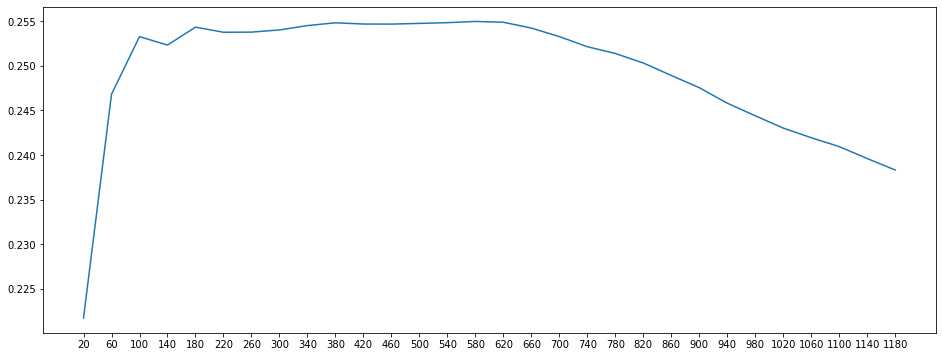

In [249]:
fig,ax = plt.subplots(figsize=(16,6))
plt.plot(scores.index,scores.values)

In [250]:
skl_knn = knn(n_neighbors = int(indx)).fit(X_train1, y_train1)  #####
knn_score1 = skl_knn.score(X_test1,y_test1)
print(knn_score1)

0.27378530213152075


#### (2) Random Forest

In [251]:
from sklearn.ensemble import RandomForestRegressor as rf
cross_val_score(rf(n_estimators = 100, max_depth = 3), X_train1, y_train1.ravel(), cv=5).mean()


0.25515309288403865

In [252]:
cv_scores = pd.DataFrame()
for i in range (1,25):
    cv_scores.loc[i,'rf'] = cross_val_score(rf(n_estimators = 100, max_depth = i), X_train1, y_train1.ravel(),cv=5).mean()

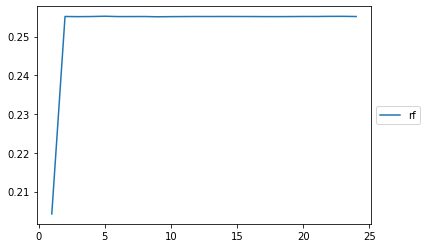

In [253]:
ax = cv_scores.plot()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [254]:
indx = scores.idxmax()
skl_rf = rf(n_estimators=100,max_depth=int(indx)).fit(X_train1, y_train1.ravel())
rf_score1 = skl_rf.score(X_test1,y_test1)
print(rf_score1)

0.2739916217016166


In [255]:
score_table = pd.DataFrame({'K Nearest Neighbors':[knn_score1],'Random Forest':[rf_score1]})
score_table = score_table.T
score_table.columns = ['Score']
score_table

Score
K Nearest Neighbors  0.273785
Random Forest        0.273992

#### According to the table above, we can use Random Forest as the score for this model for log_price, which is higher than KNN.
#### However, the score of KNN and Random Forest are relatively low. It could be due to some intangible features such as 
#### the room quality, service friendliness, and the environment, etc

In [256]:
sh2 = sh.loc[:,['id', 'neighbourhood', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews' ]]
sh2['city'] = np.array(['shanghai']*len(sh))
lst = []
for i in sh2['price']:
    i1 = i*0.15
    lst.append(i1)
sh2['price'] = lst

In [257]:
ist2 = istb.loc[:,['id', 'neighbourhood', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews' ]]
ist2['city'] = np.array(['istanbul']*len(istb))
lst2=[]
for i in ist2['price']:
    i1 = i*0.13
    lst2.append(i1)

ist2['price'] = lst2

In [258]:
tky2 = tky.loc[:,['id', 'neighbourhood', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews' ]]
tky2['city'] = np.array(['tokyo']*len(tky))
lst3=[]
for i in tky2['price']:
    i1 = i*0.0097
    lst3.append(i1)

tky2['price'] = lst3

In [259]:
sg2 = sp.loc[:,['id', 'neighbourhood', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews' ]]
sg2['city'] = np.array(['Singapore']*len(sp))
lst4=[]
for i in sg2['price']:
    i1 = i*0.75
    lst4.append(i1)

sg2['price'] = lst4

In [260]:
total = pd.concat([sh2,ist2,tky2,sg2],sort=False)

In [261]:
total

id           neighbourhood        room_type   price  \
0        24963    徐汇区 / Xuhui District  Entire home/apt   70.20   
1        24991    徐汇区 / Xuhui District  Entire home/apt   80.25   
2       139828    普陀区 / Putuo District  Entire home/apt   53.25   
3       139846  静安区 / Jing'an District  Entire home/apt   87.60   
5       185736    徐汇区 / Xuhui District     Private room   75.00   
...        ...                     ...              ...     ...   
7902  38105126              Queenstown  Entire home/apt   75.00   
7903  38108273                 Tanglin  Entire home/apt  412.50   
7904  38109336                 Kallang     Private room   43.50   
7905  38110493            River Valley     Private room   42.00   
7906  38112762            River Valley     Private room   48.75   

      minimum_nights  number_of_reviews       city  
0                  3                 85   shanghai  
1                  3                  1   shanghai  
2                  3                 26   shanghai  
3                  1                 57   shanghai  
5                  1                  8   shanghai  
...              ...                ...        ...  
7902               3                  0  Singapore  
7903               6                  0  Singapore  
7904              30                  0  Singapore  
7905              14                  0  Singapore  
7906              90                  0  Singapore  

[62072 rows x 7 columns]

### The number of listing comparison

Text(0.5, 1.0, 'Number of listings in each city')

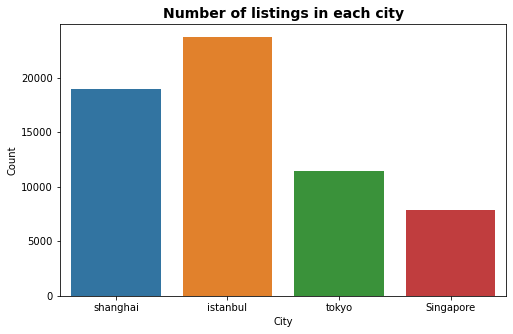

In [262]:
figure,ax = plt.subplots(figsize=(8,5))
sns.countplot(x='city',data=total,ax=ax)
ax.set_xlabel('City')
ax.set_ylabel('Count')
ax.set_title('Number of listings in each city',size=14,fontweight='bold')

### The price comparison

Text(0.5, 1.0, 'Density and distribution of prices for each city in USD')

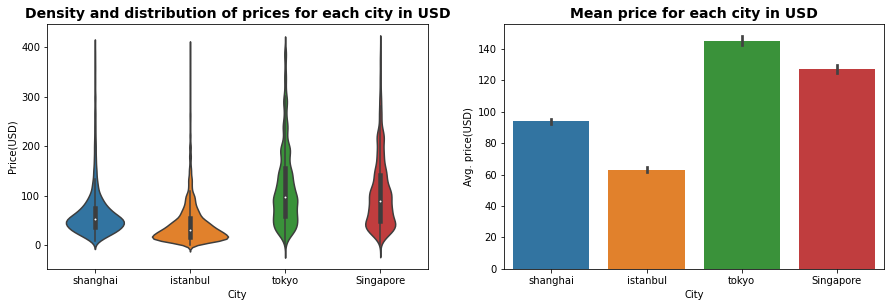

In [263]:
total_dealt = total[total.price < 400]    
figure,ax = plt.subplots(1,2,figsize=(15,4.5))
sns.barplot(x='city', y='price', data=total, ci=68,ax=ax[1])
ax[1].set_xlabel('City')
ax[1].set_ylabel('Avg. price(USD)')
ax[1].set_title('Mean price for each city in USD',size=14, fontweight='bold')
sns.violinplot(data=total_dealt,x='city',y='price',ax=ax[0])
ax[0].set_xlabel('City')
ax[0].set_ylabel('Price(USD)')
ax[0].set_title('Density and distribution of prices for each city in USD',size=14, fontweight='bold')

### The room type comparison


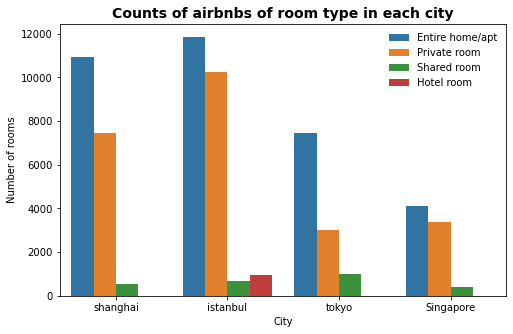

In [264]:
figure,ax = plt.subplots(figsize=(8,5))
sns.countplot(data=total,x='city',hue='room_type',ax=ax)
ax.set_title('Counts of airbnbs of room type in each city',fontsize=14,fontweight ='bold')
ax.set_xlabel('City')
ax.set_ylabel('Number of rooms')
ax.legend(frameon=False)

 #### Generally, there are the most entire rooms listing, followed by private rooms and shared rooms. In Singapore, the difference of the amount of listed entire room and private room is small.

### Machine Learning Comparison

In [265]:
scoreTable = {'K Nearest Neighbors': [0.170709,0.209943,0.442015,0.273785],
'Random Forest': [0.177920,0.210339,0.447361,0.273956]}
scoreTable = pd.DataFrame(scoreTable)
scoreTable["Prediction"] = list(["Shanghai","Istanbul","Singapore","Tokyo"])
scoreTable = scoreTable.set_index("Prediction")
scoreTable = scoreTable.T
scoreTable

Prediction           Shanghai  Istanbul  Singapore     Tokyo
K Nearest Neighbors  0.170709  0.209943   0.442015  0.273785
Random Forest        0.177920  0.210339   0.447361  0.273956

#### So we use Random Forest for the four cities for predictions since their scores are higher than K-nn

# Sentimental Analysis

In [266]:
conda install -c conda-forge wordcloud #import wordcloud for sentimental analysis visualization

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [267]:
sh_r = pd.read_csv('https://raw.githubusercontent.com/570558305/airbnb_review/master/sh_reviews.csv', header= 0,
                   encoding= 'unicode_escape')
sh_r.head(5)

comments
0  Even though the actual apt listed was not read...
1  Jia's place is in a vibrant and (in my opinion...
2  The host canceled my reservation the day befor...
3                 _°ç_ä½_½®__å¥½ç_,_¿å__´ä_ç¬¦å_é¢__
4     ä½_½®__¸¸å¥,_»å_____¹ä¾¿,_¿é_å¾_¹²_,å®__,__å¥!

In [268]:
import pandas as pd
istanbul = pd.read_csv(r'/Users/amyshuning/Desktop/istb_reviews.csv',header=0, encoding = 'unicode_escape')
istanbul

comments
0      My daughter and her friend and I all stayed at...
1      Amazing location, super friendly hosts and rea...
2      I had an amazing stay! The room was spacious w...
3      I wasn't sure about the location at first, thi...
4            TÃ¼rkische Gastfreundschaft par excellence!
...                                                  ...
28394                                                  .
28395  It won't be long till this is on Airbnb Luxe. ...
28396  Harika bir ev, inanÄ±lmaz gÃ¼zel bir manzara, ...
28397  ___Ð°Ð½Ð°Ð²Ð»Ð¸Ð²Ð°Ð»__ Ð½Ð° Ð´Ð²Ð° Ð´Ð½_. Ð­_...
28398  Mehmet__ place is even more beautiful than dep...

[28399 rows x 1 columns]

In [269]:
sp_r = pd.read_csv('https://raw.githubusercontent.com/570558305/airbnb_review/master/sp_reviews.csv', header= 0,
                        encoding= 'unicode_escape')
sp_r.head()

comments
0  Fran was absolutely gracious and welcoming. Ma...
1  A comfortable room in a smart condo developmen...
2  esta ubicado frente al barrio chino, se encuen...
3                    The location is very convenient
4  The apartment is simple yet has everything you...

In [270]:
tky_r = pd.read_csv('https://raw.githubusercontent.com/570558305/airbnb_review/master/tky_reviews.csv', header= 0,
                        encoding= 'unicode_escape')
tky_r

comments
0      Couldn__ get any better!\r\n\r\nThe apartment ...
1          Nice place to stay. Really liked ishikawatai.
2      _±æ¥æ_ä¸___³å__°é____»ã_è¿__ï½¤å____ï½ºï_ï¾__ï...
3        Great room for a great value. would stay again.
4      nice environment and the host is really kind. ...
...                                                  ...
25251                            ï½µï½¼ï½_ï½¤è²·___ä¾¿å_
25252  ___å±__ä½__å±_____ï½5äººã_æ³__________½¤______...
25253  Shintaro is a very great landlord. He prepared...
25254  __æ»___§ã__·æ_æ»___§ã_ä¸___±ã_________½¤å¿____...
25255  é§_____è¿__ï½¤ã__¨å___¶ºéº__ï½±ï_ï¾__ï½¨ã_____...

[25256 rows x 1 columns]

#### AFINN is a list of English words rated for valence with an integer between minus five (negative) and plus five (positive). The words have been manually labeled by Finn Årup Nielsen in 2009-2011. The file is tab-separated. 

In [271]:
afinn_data = {"abandon":"-2","abandoned":"-2","abandons":"-2","abducted":"-2","abduction":"-2",
              "abductions":"-2","abhor":"-3","abhorred":"-3","abhorrent":"-3","abhors":"-3",
              "abilities":"2","ability":"2","aboard":"1","absentee":"-1","absentees":"-1","absolve":"2",
              "absolved":"2","absolves":"2","absolving":"2","absorbed":"1","abuse":"-3","abused":"-3",
              "abuses":"-3","abusive":"-3","accept":"1","accepted":"1","accepting":"1","accepts":"1",
              "accident":"-2","accidental":"-2","accidentally":"-2","accidents":"-2","accomplish":"2",
              "accomplished":"2","accomplishes":"2","accusation":"-2","accusations":"-2","accuse":"-2",
              "accused":"-2","accuses":"-2","accusing":"-2","ache":"-2","achievable":"1","aching":"-2",
              "acquit":"2","acquits":"2","acquitted":"2","acquitting":"2","acrimonious":"-3","active":"1",
              "adequate":"1","admire":"3","admired":"3","admires":"3","admiring":"3","admit":"-1",
              "admits":"-1","admitted":"-1","admonish":"-2","admonished":"-2","adopt":"1","adopts":"1",
              "adorable":"3","adore":"3","adored":"3","adores":"3","advanced":"1","advantage":"2",
              "advantages":"2","adventure":"2","adventures":"2","adventurous":"2","affected":"-1",
              "affection":"3","affectionate":"3","afflicted":"-1","affronted":"-1","afraid":"-2","aggravate":"-2","aggravated":"-2",
              "aggravates":"-2","aggravating":"-2","aggression":"-2","aggressions":"-2","aggressive":"-2","aghast":"-2","agog":"2",
              "agonise":"-3","agonised":"-3","agonises":"-3","agonising":"-3","agonize":"-3","agonized":"-3","agonizes":"-3","agonizing":"-3","agree":"1","agreeable":"2","agreed":"1","agreement":"1","agrees":"1","alarm":"-2","alarmed":"-2","alarmist":"-2","alarmists":"-2","alas":"-1","alert":"-1","alienation":"-2","alive":"1","allergic":"-2","allow":"1","alone":"-2","amaze":"2","amazed":"2","amazes":"2","amazing":"4","ambitious":"2","ambivalent":"-1","amuse":"3","amused":"3","amusement":"3","amusements":"3","anger":"-3","angers":"-3","angry":"-3","anguish":"-3","anguished":"-3","animosity":"-2","annoy":"-2","annoyance":"-2","annoyed":"-2","annoying":"-2","annoys":"-2","antagonistic":"-2","anti":"-1","anticipation":"1","anxiety":"-2","anxious":"-2","apathetic":"-3","apathy":"-3","apeshit":"-3","apocalyptic":"-2","apologise":"-1","apologised":"-1","apologises":"-1","apologising":"-1","apologize":"-1","apologized":"-1","apologizes":"-1","apologizing":"-1","apology":"-1","appalled":"-2","appalling":"-2","appease":"2","appeased":"2","appeases":"2","appeasing":"2","applaud":"2","applauded":"2","applauding":"2","applauds":"2","applause":"2","appreciate":"2","appreciated":"2","appreciates":"2","appreciating":"2","appreciation":"2","apprehensive":"-2","approval":"2","approved":"2","approves":"2","ardent":"1","arrest":"-2","arrested":"-3","arrests":"-2","arrogant":"-2","ashame":"-2","ashamed":"-2","ass":"-4","assassination":"-3","assassinations":"-3","asset":"2","assets":"2","assfucking":"-4","asshole":"-4","astonished":"2","astound":"3","astounded":"3","astounding":"3","astoundingly":"3","astounds":"3","attack":"-1","attacked":"-1","attacking":"-1","attacks":"-1","attract":"1","attracted":"1","attracting":"2","attraction":"2","attractions":"2","attracts":"1","audacious":"3","authority":"1","avert":"-1","averted":"-1","averts":"-1","avid":"2","avoid":"-1","avoided":"-1","avoids":"-1","await":"-1","awaited":"-1","awaits":"-1","award":"3","awarded":"3","awards":"3","awesome":"4","awful":"-3","awkward":"-2","axe":"-1","axed":"-1","backed":"1","backing":"2","backs":"1","bad":"-3","badass":"-3","badly":"-3","bailout":"-2","bamboozle":"-2","bamboozled":"-2","bamboozles":"-2","ban":"-2","banish":"-1","bankrupt":"-3","bankster":"-3","banned":"-2","bargain":"2","barrier":"-2","bastard":"-5","bastards":"-5","battle":"-1","battles":"-1","beaten":"-2","beatific":"3","beating":"-1","beauties":"3","beautiful":"3","beautifully":"3","beautify":"3","belittle":"-2","belittled":"-2","beloved":"3","benefit":"2","benefits":"2","benefitted":"2","benefitting":"2","bereave":"-2","bereaved":"-2","bereaves":"-2","bereaving":"-2","best":"3","betray":"-3","betrayal":"-3","betrayed":"-3","betraying":"-3","betrays":"-3","better":"2","bias":"-1","biased":"-2","big":"1","bitch":"-5","bitches":"-5","bitter":"-2","bitterly":"-2","bizarre":"-2","blah":"-2","blame":"-2","blamed":"-2","blames":"-2","blaming":"-2","bless":"2","blesses":"2","blessing":"3","blind":"-1","bliss":"3","blissful":"3","blithe":"2","block":"-1","blockbuster":"3","blocked":"-1","blocking":"-1","blocks":"-1","bloody":"-3","blurry":"-2","boastful":"-2","bold":"2","boldly":"2","bomb":"-1","boost":"1","boosted":"1","boosting":"1","boosts":"1","bore":"-2","bored":"-2","boring":"-3","bother":"-2","bothered":"-2","bothers":"-2","bothersome":"-2","boycott":"-2","boycotted":"-2","boycotting":"-2","boycotts":"-2","brainwashing":"-3","brave":"2","breakthrough":"3","breathtaking":"5","bribe":"-3","bright":"1","brightest":"2","brightness":"1","brilliant":"4","brisk":"2","broke":"-1","broken":"-1","brooding":"-2","bullied":"-2","bullshit":"-4","bully":"-2","bullying":"-2","bummer":"-2","buoyant":"2","burden":"-2","burdened":"-2","burdening":"-2","burdens":"-2","calm":"2","calmed":"2","calming":"2","calms":"2","can't stand":"-3","cancel":"-1","cancelled":"-1","cancelling":"-1","cancels":"-1","cancer":"-1","capable":"1","captivated":"3","care":"2","carefree":"1","careful":"2","carefully":"2","careless":"-2","cares":"2","cashing in":"-2","casualty":"-2","catastrophe":"-3","catastrophic":"-4","cautious":"-1","celebrate":"3","celebrated":"3","celebrates":"3","celebrating":"3","censor":"-2","censored":"-2","censors":"-2","certain":"1","chagrin":"-2","chagrined":"-2","challenge":"-1","chance":"2","chances":"2","chaos":"-2","chaotic":"-2","charged":"-3","charges":"-2","charm":"3","charming":"3","charmless":"-3","chastise":"-3","chastised":"-3","chastises":"-3","chastising":"-3","cheat":"-3","cheated":"-3","cheater":"-3","cheaters":"-3","cheats":"-3","cheer":"2","cheered":"2","cheerful":"2","cheering":"2","cheerless":"-2","cheers":"2","cheery":"3","cherish":"2","cherished":"2","cherishes":"2","cherishing":"2","chic":"2","childish":"-2","chilling":"-1","choke":"-2","choked":"-2","chokes":"-2","choking":"-2","clarifies":"2","clarity":"2","clash":"-2","classy":"3","clean":"2","cleaner":"2","clear":"1","cleared":"1","clearly":"1","clears":"1","clever":"2","clouded":"-1","clueless":"-2","cock":"-5","cocksucker":"-5","cocksuckers":"-5","cocky":"-2","coerced":"-2","collapse":"-2","collapsed":"-2","collapses":"-2","collapsing":"-2","collide":"-1","collides":"-1","colliding":"-1","collision":"-2","collisions":"-2","colluding":"-3","combat":"-1","combats":"-1","comedy":"1","comfort":"2","comfortable":"2","comforting":"2","comforts":"2","commend":"2","commended":"2","commit":"1","commitment":"2","commits":"1","committed":"1","committing":"1","compassionate":"2","compelled":"1","competent":"2","competitive":"2","complacent":"-2","complain":"-2","complained":"-2","complains":"-2","comprehensive":"2","conciliate":"2","conciliated":"2","conciliates":"2","conciliating":"2","condemn":"-2","condemnation":"-2","condemned":"-2","condemns":"-2","confidence":"2","confident":"2","conflict":"-2","conflicting":"-2","conflictive":"-2","conflicts":"-2","confuse":"-2","confused":"-2","confusing":"-2","congrats":"2","congratulate":"2","congratulation":"2","congratulations":"2","consent":"2","consents":"2","consolable":"2","conspiracy":"-3","constrained":"-2","contagion":"-2","contagions":"-2","contagious":"-1","contempt":"-2","contemptuous":"-2","contemptuously":"-2","contend":"-1","contender":"-1","contending":"-1","contentious":"-2","contestable":"-2","controversial":"-2","controversially":"-2","convince":"1","convinced":"1","convinces":"1","convivial":"2","cool":"1","cool stuff":"3","cornered":"-2","corpse":"-1","costly":"-2","courage":"2","courageous":"2","courteous":"2","courtesy":"2","cover-up":"-3","coward":"-2","cowardly":"-2","coziness":"2","cramp":"-1","crap":"-3","crash":"-2","crazier":"-2","craziest":"-2","crazy":"-2","creative":"2","crestfallen":"-2","cried":"-2","cries":"-2","crime":"-3","criminal":"-3","criminals":"-3","crisis":"-3","critic":"-2","criticism":"-2","criticize":"-2","criticized":"-2","criticizes":"-2","criticizing":"-2","critics":"-2","cruel":"-3","cruelty":"-3","crush":"-1","crushed":"-2","crushes":"-1","crushing":"-1","cry":"-1","crying":"-2","cunt":"-5","curious":"1","curse":"-1","cut":"-1","cute":"2","cuts":"-1","cutting":"-1","cynic":"-2","cynical":"-2","cynicism":"-2","damage":"-3","damages":"-3","damn":"-4","damned":"-4","damnit":"-4","danger":"-2","daredevil":"2","daring":"2","darkest":"-2","darkness":"-1","dauntless":"2","dead":"-3","deadlock":"-2","deafening":"-1","dear":"2","dearly":"3","death":"-2","debonair":"2","debt":"-2","deceit":"-3","deceitful":"-3","deceive":"-3","deceived":"-3","deceives":"-3","deceiving":"-3","deception":"-3","decisive":"1","dedicated":"2","defeated":"-2","defect":"-3","defects":"-3","defender":"2","defenders":"2","defenseless":"-2","defer":"-1","deferring":"-1","defiant":"-1","deficit":"-2","degrade":"-2","degraded":"-2","degrades":"-2","dehumanize":"-2","dehumanized":"-2","dehumanizes":"-2","dehumanizing":"-2","deject":"-2","dejected":"-2","dejecting":"-2","dejects":"-2","delay":"-1","delayed":"-1","delight":"3","delighted":"3","delighting":"3","delights":"3","demand":"-1","demanded":"-1","demanding":"-1","demands":"-1","demonstration":"-1","demoralized":"-2","denied":"-2","denier":"-2","deniers":"-2","denies":"-2","denounce":"-2","denounces":"-2","deny":"-2","denying":"-2","depressed":"-2","depressing":"-2","derail":"-2","derailed":"-2","derails":"-2","deride":"-2","derided":"-2","derides":"-2","deriding":"-2","derision":"-2","desirable":"2","desire":"1","desired":"2","desirous":"2","despair":"-3","despairing":"-3","despairs":"-3","desperate":"-3","desperately":"-3","despondent":"-3","destroy":"-3","destroyed":"-3","destroying":"-3","destroys":"-3","destruction":"-3","destructive":"-3","detached":"-1","detain":"-2","detained":"-2","detention":"-2","determined":"2","devastate":"-2","devastated":"-2","devastating":"-2","devoted":"3","diamond":"1","dick":"-4","dickhead":"-4","die":"-3","died":"-3","difficult":"-1","diffident":"-2","dilemma":"-1","dipshit":"-3","dire":"-3","direful":"-3","dirt":"-2","dirtier":"-2","dirtiest":"-2","dirty":"-2","disabling":"-1","disadvantage":"-2","disadvantaged":"-2","disappear":"-1","disappeared":"-1","disappears":"-1","disappoint":"-2","disappointed":"-2","disappointing":"-2","disappointment":"-2","disappointments":"-2","disappoints":"-2","disaster":"-2","disasters":"-2","disastrous":"-3","disbelieve":"-2","discard":"-1","discarded":"-1","discarding":"-1","discards":"-1","disconsolate":"-2","disconsolation":"-2","discontented":"-2","discord":"-2","discounted":"-1","discouraged":"-2","discredited":"-2","disdain":"-2","disgrace":"-2","disgraced":"-2","disguise":"-1","disguised":"-1","disguises":"-1","disguising":"-1","disgust":"-3","disgusted":"-3","disgusting":"-3","disheartened":"-2","dishonest":"-2","disillusioned":"-2","disinclined":"-2","disjointed":"-2","dislike":"-2","dismal":"-2","dismayed":"-2","disorder":"-2","disorganized":"-2","disoriented":"-2","disparage":"-2","disparaged":"-2","disparages":"-2","disparaging":"-2","displeased":"-2","dispute":"-2","disputed":"-2","disputes":"-2","disputing":"-2","disqualified":"-2","disquiet":"-2","disregard":"-2","disregarded":"-2","disregarding":"-2","disregards":"-2","disrespect":"-2","disrespected":"-2","disruption":"-2","disruptions":"-2","disruptive":"-2","dissatisfied":"-2","distort":"-2","distorted":"-2","distorting":"-2","distorts":"-2","distract":"-2","distracted":"-2","distraction":"-2","distracts":"-2","distress":"-2","distressed":"-2","distresses":"-2","distressing":"-2","distrust":"-3","distrustful":"-3","disturb":"-2","disturbed":"-2","disturbing":"-2","disturbs":"-2","dithering":"-2","dizzy":"-1","dodging":"-2","dodgy":"-2","does not work":"-3","dolorous":"-2","dont like":"-2","doom":"-2","doomed":"-2","doubt":"-1","doubted":"-1","doubtful":"-1","doubting":"-1","doubts":"-1","douche":"-3","douchebag":"-3","downcast":"-2","downhearted":"-2","downside":"-2","drag":"-1","dragged":"-1","drags":"-1","drained":"-2","dread":"-2","dreaded":"-2","dreadful":"-3","dreading":"-2","dream":"1","dreams":"1","dreary":"-2","droopy":"-2","drop":"-1","drown":"-2","drowned":"-2","drowns":"-2","drunk":"-2","dubious":"-2","dud":"-2","dull":"-2","dumb":"-3","dumbass":"-3","dump":"-1","dumped":"-2","dumps":"-1","dupe":"-2","duped":"-2","dysfunction":"-2","eager":"2","earnest":"2","ease":"2","easy":"1","ecstatic":"4","eerie":"-2","eery":"-2","effective":"2","effectively":"2","elated":"3","elation":"3","elegant":"2","elegantly":"2","embarrass":"-2","embarrassed":"-2","embarrasses":"-2","embarrassing":"-2","embarrassment":"-2","embittered":"-2","embrace":"1","emergency":"-2","empathetic":"2","emptiness":"-1","empty":"-1","enchanted":"2","encourage":"2","encouraged":"2","encouragement":"2","encourages":"2","endorse":"2","endorsed":"2","endorsement":"2","endorses":"2","enemies":"-2","enemy":"-2","energetic":"2","engage":"1","engages":"1","engrossed":"1","enjoy":"2","enjoying":"2","enjoys":"2","enlighten":"2","enlightened":"2","enlightening":"2","enlightens":"2","ennui":"-2","enrage":"-2","enraged":"-2","enrages":"-2","enraging":"-2","enrapture":"3","enslave":"-2","enslaved":"-2","enslaves":"-2","ensure":"1","ensuring":"1","enterprising":"1","entertaining":"2","enthral":"3","enthusiastic":"3","entitled":"1","entrusted":"2","envies":"-1","envious":"-2","envy":"-1","envying":"-1","erroneous":"-2","error":"-2","errors":"-2","escape":"-1","escapes":"-1","escaping":"-1","esteemed":"2","ethical":"2","euphoria":"3","euphoric":"4","eviction":"-1","evil":"-3","exaggerate":"-2","exaggerated":"-2","exaggerates":"-2","exaggerating":"-2","exasperated":"2","excellence":"3","excellent":"3","excite":"3","excited":"3","excitement":"3","exciting":"3","exclude":"-1","excluded":"-2","exclusion":"-1","exclusive":"2","excuse":"-1","exempt":"-1","exhausted":"-2","exhilarated":"3","exhilarates":"3","exhilarating":"3","exonerate":"2","exonerated":"2","exonerates":"2","exonerating":"2","expand":"1","expands":"1","expel":"-2","expelled":"-2","expelling":"-2","expels":"-2","exploit":"-2","exploited":"-2","exploiting":"-2","exploits":"-2","exploration":"1","explorations":"1","expose":"-1","exposed":"-1","exposes":"-1","exposing":"-1","extend":"1","extends":"1","exuberant":"4","exultant":"3","exultantly":"3","fabulous":"4","fad":"-2","fag":"-3","faggot":"-3","faggots":"-3","fail":"-2","failed":"-2","failing":"-2","fails":"-2","failure":"-2","failures":"-2","fainthearted":"-2","fair":"2","faith":"1","faithful":"3","fake":"-3","fakes":"-3","faking":"-3","fallen":"-2","falling":"-1","falsified":"-3","falsify":"-3","fame":"1","fan":"3","fantastic":"4","farce":"-1","fascinate":"3","fascinated":"3","fascinates":"3","fascinating":"3","fascist":"-2","fascists":"-2","fatalities":"-3","fatality":"-3","fatigue":"-2","fatigued":"-2","fatigues":"-2","fatiguing":"-2","favor":"2","favored":"2","favorite":"2","favorited":"2","favorites":"2","favors":"2","fear":"-2","fearful":"-2","fearing":"-2","fearless":"2","fearsome":"-2","fed up":"-3","feeble":"-2","feeling":"1","felonies":"-3","felony":"-3","fervent":"2","fervid":"2","festive":"2","fiasco":"-3","fidgety":"-2","fight":"-1","fine":"2","fire":"-2","fired":"-2","firing":"-2","fit":"1","fitness":"1","flagship":"2","flees":"-1","flop":"-2","flops":"-2","flu":"-2","flustered":"-2","focused":"2","fond":"2","fondness":"2","fool":"-2","foolish":"-2","fools":"-2","forced":"-1","foreclosure":"-2","foreclosures":"-2","forget":"-1","forgetful":"-2","forgive":"1","forgiving":"1","forgotten":"-1","fortunate":"2","frantic":"-1","fraud":"-4","frauds":"-4","fraudster":"-4","fraudsters":"-4","fraudulence":"-4","fraudulent":"-4","free":"1","freedom":"2","frenzy":"-3","fresh":"1","friendly":"2","fright":"-2","frightened":"-2","frightening":"-3","frikin":"-2","frisky":"2","frowning":"-1","frustrate":"-2","frustrated":"-2","frustrates":"-2","frustrating":"-2","frustration":"-2","ftw":"3","fuck":"-4","fucked":"-4","fucker":"-4","fuckers":"-4","fuckface":"-4","fuckhead":"-4","fucking":"-4","fucktard":"-4","fud":"-3","fuked":"-4","fuking":"-4","fulfill":"2","fulfilled":"2","fulfills":"2","fuming":"-2","fun":"4","funeral":"-1","funerals":"-1","funky":"2","funnier":"4","funny":"4","furious":"-3","futile":"2","gag":"-2","gagged":"-2","gain":"2","gained":"2","gaining":"2","gains":"2","gallant":"3","gallantly":"3","gallantry":"3","generous":"2","genial":"3","ghost":"-1","giddy":"-2","gift":"2","glad":"3","glamorous":"3","glamourous":"3","glee":"3","gleeful":"3","gloom":"-1","gloomy":"-2","glorious":"2","glory":"2","glum":"-2","god":"1","goddamn":"-3","godsend":"4","good":"3","goodness":"3","grace":"1","gracious":"3","grand":"3","grant":"1","granted":"1","granting":"1","grants":"1","grateful":"3","gratification":"2","grave":"-2","gray":"-1","great":"3","greater":"3","greatest":"3","greed":"-3","greedy":"-2","green wash":"-3","green washing":"-3","greenwash":"-3","greenwasher":"-3","greenwashers":"-3","greenwashing":"-3","greet":"1","greeted":"1","greeting":"1","greetings":"2","greets":"1","grey":"-1","grief":"-2","grieved":"-2","gross":"-2","growing":"1","growth":"2","guarantee":"1","guilt":"-3","guilty":"-3","gullibility":"-2","gullible":"-2","gun":"-1","ha":"2","hacked":"-1","haha":"3","hahaha":"3","hahahah":"3","hail":"2","hailed":"2","hapless":"-2","haplessness":"-2","happiness":"3","happy":"3","hard":"-1","hardier":"2","hardship":"-2","hardy":"2","harm":"-2","harmed":"-2","harmful":"-2","harming":"-2","harms":"-2","harried":"-2","harsh":"-2","harsher":"-2","harshest":"-2","hate":"-3","hated":"-3","haters":"-3","hates":"-3","hating":"-3","haunt":"-1","haunted":"-2","haunting":"1","haunts":"-1","havoc":"-2","healthy":"2","heartbreaking":"-3","heartbroken":"-3","heartfelt":"3","heaven":"2","heavenly":"4","heavyhearted":"-2","hell":"-4","help":"2","helpful":"2","helping":"2","helpless":"-2","helps":"2","hero":"2","heroes":"2","heroic":"3","hesitant":"-2","hesitate":"-2","hid":"-1","hide":"-1","hides":"-1","hiding":"-1","highlight":"2","hilarious":"2","hindrance":"-2","hoax":"-2","homesick":"-2","honest":"2","honor":"2","honored":"2","honoring":"2","honour":"2","honoured":"2","honouring":"2","hooligan":"-2","hooliganism":"-2","hooligans":"-2","hope":"2","hopeful":"2","hopefully":"2","hopeless":"-2","hopelessness":"-2","hopes":"2","hoping":"2","horrendous":"-3","horrible":"-3","horrific":"-3","horrified":"-3","hostile":"-2","huckster":"-2","hug":"2","huge":"1","hugs":"2","humerous":"3","humiliated":"-3","humiliation":"-3","humor":"2","humorous":"2","humour":"2","humourous":"2","hunger":"-2","hurrah":"5","hurt":"-2","hurting":"-2","hurts":"-2","hypocritical":"-2","hysteria":"-3","hysterical":"-3","hysterics":"-3","idiot":"-3","idiotic":"-3","ignorance":"-2","ignorant":"-2","ignore":"-1","ignored":"-2","ignores":"-1","ill":"-2","illegal":"-3","illiteracy":"-2","illness":"-2","illnesses":"-2","imbecile":"-3","immobilized":"-1","immortal":"2","immune":"1","impatient":"-2","imperfect":"-2","importance":"2","important":"2","impose":"-1","imposed":"-1","imposes":"-1","imposing":"-1","impotent":"-2","impress":"3","impressed":"3","impresses":"3","impressive":"3","imprisoned":"-2","improve":"2","improved":"2","improvement":"2","improves":"2","improving":"2","inability":"-2","inaction":"-2","inadequate":"-2","incapable":"-2","incapacitated":"-2","incensed":"-2","incompetence":"-2","incompetent":"-2","inconsiderate":"-2","inconvenience":"-2","inconvenient":"-2","increase":"1","increased":"1","indecisive":"-2","indestructible":"2","indifference":"-2","indifferent":"-2","indignant":"-2","indignation":"-2","indoctrinate":"-2","indoctrinated":"-2","indoctrinates":"-2","indoctrinating":"-2","ineffective":"-2","ineffectively":"-2","infatuated":"2","infatuation":"2","infected":"-2","inferior":"-2","inflamed":"-2","influential":"2","infringement":"-2","infuriate":"-2","infuriated":"-2","infuriates":"-2","infuriating":"-2","inhibit":"-1","injured":"-2","injury":"-2","injustice":"-2","innovate":"1","innovates":"1","innovation":"1","innovative":"2","inquisition":"-2","inquisitive":"2","insane":"-2","insanity":"-2","insecure":"-2","insensitive":"-2","insensitivity":"-2","insignificant":"-2","insipid":"-2","inspiration":"2","inspirational":"2","inspire":"2","inspired":"2","inspires":"2","inspiring":"3","insult":"-2","insulted":"-2","insulting":"-2","insults":"-2","intact":"2","integrity":"2","intelligent":"2","intense":"1","interest":"1","interested":"2","interesting":"2","interests":"1","interrogated":"-2","interrupt":"-2","interrupted":"-2","interrupting":"-2","interruption":"-2","interrupts":"-2","intimidate":"-2","intimidated":"-2","intimidates":"-2","intimidating":"-2","intimidation":"-2","intricate":"2","intrigues":"1","invincible":"2","invite":"1","inviting":"1","invulnerable":"2","irate":"-3","ironic":"-1","irony":"-1","irrational":"-1","irresistible":"2","irresolute":"-2","irresponsible":"2","irreversible":"-1","irritate":"-3","irritated":"-3","irritating":"-3","isolated":"-1","itchy":"-2","jackass":"-4","jackasses":"-4","jailed":"-2","jaunty":"2","jealous":"-2","jeopardy":"-2","jerk":"-3","jesus":"1","jewel":"1","jewels":"1","jocular":"2","join":"1","joke":"2","jokes":"2","jolly":"2","jovial":"2","joy":"3","joyful":"3","joyfully":"3","joyless":"-2","joyous":"3","jubilant":"3","jumpy":"-1","justice":"2","justifiably":"2","justified":"2","keen":"1","kill":"-3","killed":"-3","killing":"-3","kills":"-3","kind":"2","kinder":"2","kiss":"2","kudos":"3","lack":"-2","lackadaisical":"-2","lag":"-1","lagged":"-2","lagging":"-2","lags":"-2","lame":"-2","landmark":"2","laugh":"1","laughed":"1","laughing":"1","laughs":"1","laughting":"1","launched":"1","lawl":"3","lawsuit":"-2","lawsuits":"-2","lazy":"-1","leak":"-1","leaked":"-1","leave":"-1","legal":"1","legally":"1","lenient":"1","lethargic":"-2","lethargy":"-2","liar":"-3","liars":"-3","libelous":"-2","lied":"-2","lifesaver":"4","lighthearted":"1","like":"2","liked":"2","likes":"2","limitation":"-1","limited":"-1","limits":"-1","litigation":"-1","litigious":"-2","lively":"2","livid":"-2","lmao":"4","lmfao":"4","loathe":"-3","loathed":"-3","loathes":"-3","loathing":"-3","lobby":"-2","lobbying":"-2","lol":"3","lonely":"-2","lonesome":"-2","longing":"-1","loom":"-1","loomed":"-1","looming":"-1","looms":"-1","loose":"-3","looses":"-3","loser":"-3","losing":"-3","loss":"-3","lost":"-3","lovable":"3","love":"3","loved":"3","lovelies":"3","lovely":"3","loving":"2","lowest":"-1","loyal":"3","loyalty":"3","luck":"3","luckily":"3","lucky":"3","lugubrious":"-2","lunatic":"-3","lunatics":"-3","lurk":"-1","lurking":"-1","lurks":"-1","mad":"-3","maddening":"-3","made-up":"-1","madly":"-3","madness":"-3","mandatory":"-1","manipulated":"-1","manipulating":"-1","manipulation":"-1","marvel":"3","marvelous":"3","marvels":"3","masterpiece":"4","masterpieces":"4","matter":"1","matters":"1","mature":"2","meaningful":"2","meaningless":"-2","medal":"3","mediocrity":"-3","meditative":"1","melancholy":"-2","menace":"-2","menaced":"-2","mercy":"2","merry":"3","mess":"-2","messed":"-2","messing up":"-2","methodical":"2","mindless":"-2","miracle":"4","mirth":"3","mirthful":"3","mirthfully":"3","misbehave":"-2","misbehaved":"-2","misbehaves":"-2","misbehaving":"-2","mischief":"-1","mischiefs":"-1","miserable":"-3","misery":"-2","misgiving":"-2","misinformation":"-2","misinformed":"-2","misinterpreted":"-2","misleading":"-3","misread":"-1","misreporting":"-2","misrepresentation":"-2","miss":"-2","missed":"-2","missing":"-2","mistake":"-2","mistaken":"-2","mistakes":"-2","mistaking":"-2","misunderstand":"-2","misunderstanding":"-2","misunderstands":"-2","misunderstood":"-2","moan":"-2","moaned":"-2","moaning":"-2","moans":"-2","mock":"-2","mocked":"-2","mocking":"-2","mocks":"-2","mongering":"-2","monopolize":"-2","monopolized":"-2","monopolizes":"-2","monopolizing":"-2","moody":"-1","mope":"-1","moping":"-1","moron":"-3","motherfucker":"-5","motherfucking":"-5","motivate":"1","motivated":"2","motivating":"2","motivation":"1","mourn":"-2","mourned":"-2","mournful":"-2","mourning":"-2","mourns":"-2","mumpish":"-2","murder":"-2","murderer":"-2","murdering":"-3","murderous":"-3","murders":"-2","myth":"-1","n00b":"-2","naive":"-2","nasty":"-3","natural":"1","naïve":"-2","needy":"-2","negative":"-2","negativity":"-2","neglect":"-2","neglected":"-2","neglecting":"-2","neglects":"-2","nerves":"-1","nervous":"-2","nervously":"-2","nice":"3","nifty":"2","niggas":"-5","nigger":"-5","no":"-1","no fun":"-3","noble":"2","noisy":"-1","nonsense":"-2","noob":"-2","nosey":"-2","not good":"-2","not working":"-3","notorious":"-2","novel":"2","numb":"-1","nuts":"-3","obliterate":"-2","obliterated":"-2","obnoxious":"-3","obscene":"-2","obsessed":"2","obsolete":"-2","obstacle":"-2","obstacles":"-2","obstinate":"-2","odd":"-2","offend":"-2","offended":"-2","offender":"-2","offending":"-2","offends":"-2","offline":"-1","oks":"2","ominous":"3","once-in-a-lifetime":"3","opportunities":"2","opportunity":"2","oppressed":"-2","oppressive":"-2","optimism":"2","optimistic":"2","optionless":"-2","outcry":"-2","outmaneuvered":"-2","outrage":"-3","outraged":"-3","outreach":"2","outstanding":"5","overjoyed":"4","overload":"-1","overlooked":"-1","overreact":"-2","overreacted":"-2","overreaction":"-2","overreacts":"-2","oversell":"-2","overselling":"-2","oversells":"-2","oversimplification":"-2","oversimplified":"-2","oversimplifies":"-2","oversimplify":"-2","overstatement":"-2","overstatements":"-2","overweight":"-1","oxymoron":"-1","pain":"-2","pained":"-2","panic":"-3","panicked":"-3","panics":"-3","paradise":"3","paradox":"-1","pardon":"2","pardoned":"2","pardoning":"2","pardons":"2","parley":"-1","passionate":"2","passive":"-1","passively":"-1","pathetic":"-2","pay":"-1","peace":"2","peaceful":"2","peacefully":"2","penalty":"-2","pensive":"-1","perfect":"3","perfected":"2","perfectly":"3","perfects":"2","peril":"-2","perjury":"-3","perpetrator":"-2","perpetrators":"-2","perplexed":"-2","persecute":"-2","persecuted":"-2","persecutes":"-2","persecuting":"-2","perturbed":"-2","pesky":"-2","pessimism":"-2","pessimistic":"-2","petrified":"-2","phobic":"-2","picturesque":"2","pileup":"-1","pique":"-2","piqued":"-2","piss":"-4","pissed":"-4","pissing":"-3","piteous":"-2","pitied":"-1","pity":"-2","playful":"2","pleasant":"3","please":"1","pleased":"3","pleasure":"3","poised":"-2","poison":"-2","poisoned":"-2","poisons":"-2","pollute":"-2","polluted":"-2","polluter":"-2","polluters":"-2","pollutes":"-2","poor":"-2","poorer":"-2","poorest":"-2","popular":"3","positive":"2","positively":"2","possessive":"-2","postpone":"-1","postponed":"-1","postpones":"-1","postponing":"-1","poverty":"-1","powerful":"2","powerless":"-2","praise":"3","praised":"3","praises":"3","praising":"3","pray":"1","praying":"1","prays":"1","prblm":"-2","prblms":"-2","prepared":"1","pressure":"-1","pressured":"-2","pretend":"-1","pretending":"-1","pretends":"-1","pretty":"1","prevent":"-1","prevented":"-1","preventing":"-1","prevents":"-1","prick":"-5","prison":"-2","prisoner":"-2","prisoners":"-2","privileged":"2","proactive":"2","problem":"-2","problems":"-2","profiteer":"-2","progress":"2","prominent":"2","promise":"1","promised":"1","promises":"1","promote":"1","promoted":"1","promotes":"1","promoting":"1","propaganda":"-2","prosecute":"-1","prosecuted":"-2","prosecutes":"-1","prosecution":"-1","prospect":"1","prospects":"1","prosperous":"3","protect":"1","protected":"1","protects":"1","protest":"-2","protesters":"-2","protesting":"-2","protests":"-2","proud":"2","proudly":"2","provoke":"-1","provoked":"-1","provokes":"-1","provoking":"-1","pseudoscience":"-3","punish":"-2","punished":"-2","punishes":"-2","punitive":"-2","pushy":"-1","puzzled":"-2","quaking":"-2","questionable":"-2","questioned":"-1","questioning":"-1","racism":"-3","racist":"-3","racists":"-3","rage":"-2","rageful":"-2","rainy":"-1","rant":"-3","ranter":"-3","ranters":"-3","rants":"-3","rape":"-4","rapist":"-4","rapture":"2","raptured":"2","raptures":"2","rapturous":"4","rash":"-2","ratified":"2","reach":"1","reached":"1","reaches":"1","reaching":"1","reassure":"1","reassured":"1","reassures":"1","reassuring":"2","rebellion":"-2","recession":"-2","reckless":"-2","recommend":"2","recommended":"2","recommends":"2","redeemed":"2","refuse":"-2","refused":"-2","refusing":"-2","regret":"-2","regretful":"-2","regrets":"-2","regretted":"-2","regretting":"-2","reject":"-1","rejected":"-1","rejecting":"-1","rejects":"-1","rejoice":"4","rejoiced":"4","rejoices":"4","rejoicing":"4","relaxed":"2","relentless":"-1","reliant":"2","relieve":"1","relieved":"2","relieves":"1","relieving":"2","relishing":"2","remarkable":"2","remorse":"-2","repulse":"-1","repulsed":"-2","rescue":"2","rescued":"2","rescues":"2","resentful":"-2","resign":"-1","resigned":"-1","resigning":"-1","resigns":"-1","resolute":"2","resolve":"2","resolved":"2","resolves":"2","resolving":"2","respected":"2","responsible":"2","responsive":"2","restful":"2","restless":"-2","restore":"1","restored":"1","restores":"1","restoring":"1","restrict":"-2","restricted":"-2","restricting":"-2","restriction":"-2","restricts":"-2","retained":"-1","retard":"-2","retarded":"-2","retreat":"-1","revenge":"-2","revengeful":"-2","revered":"2","revive":"2","revives":"2","reward":"2","rewarded":"2","rewarding":"2","rewards":"2","rich":"2","ridiculous":"-3","rig":"-1","rigged":"-1","right direction":"3","rigorous":"3","rigorously":"3","riot":"-2","riots":"-2","risk":"-2","risks":"-2","rob":"-2","robber":"-2","robed":"-2","robing":"-2","robs":"-2","robust":"2","rofl":"4","roflcopter":"4","roflmao":"4","romance":"2","rotfl":"4","rotflmfao":"4","rotflol":"4","ruin":"-2","ruined":"-2","ruining":"-2","ruins":"-2","sabotage":"-2","sad":"-2","sadden":"-2","saddened":"-2","sadly":"-2","safe":"1","safely":"1","safety":"1","salient":"1","sappy":"-1","sarcastic":"-2","satisfied":"2","save":"2","saved":"2","scam":"-2","scams":"-2","scandal":"-3","scandalous":"-3","scandals":"-3","scapegoat":"-2","scapegoats":"-2","scare":"-2","scared":"-2","scary":"-2","sceptical":"-2","scold":"-2","scoop":"3","scorn":"-2","scornful":"-2","scream":"-2","screamed":"-2","screaming":"-2","screams":"-2","screwed":"-2","screwed up":"-3","scumbag":"-4","secure":"2","secured":"2","secures":"2","sedition":"-2","seditious":"-2","seduced":"-1","self-confident":"2","self-deluded":"-2","selfish":"-3","selfishness":"-3","sentence":"-2","sentenced":"-2","sentences":"-2","sentencing":"-2","serene":"2","severe":"-2","sexy":"3","shaky":"-2","shame":"-2","shamed":"-2","shameful":"-2","share":"1","shared":"1","shares":"1","shattered":"-2","shit":"-4","shithead":"-4","shitty":"-3","shock":"-2","shocked":"-2","shocking":"-2","shocks":"-2","shoot":"-1","short-sighted":"-2","short-sightedness":"-2","shortage":"-2","shortages":"-2","shrew":"-4","shy":"-1","sick":"-2","sigh":"-2","significance":"1","significant":"1","silencing":"-1","silly":"-1","sincere":"2","sincerely":"2","sincerest":"2","sincerity":"2","sinful":"-3","singleminded":"-2","skeptic":"-2","skeptical":"-2","skepticism":"-2","skeptics":"-2","slam":"-2","slash":"-2","slashed":"-2","slashes":"-2","slashing":"-2","slavery":"-3","sleeplessness":"-2","slick":"2","slicker":"2","slickest":"2","sluggish":"-2","slut":"-5","smart":"1","smarter":"2","smartest":"2","smear":"-2","smile":"2","smiled":"2","smiles":"2","smiling":"2","smog":"-2","sneaky":"-1","snub":"-2","snubbed":"-2","snubbing":"-2","snubs":"-2","sobering":"1","solemn":"-1","solid":"2","solidarity":"2","solution":"1","solutions":"1","solve":"1","solved":"1","solves":"1","solving":"1","somber":"-2","some kind":"0","son-of-a-bitch":"-5","soothe":"3","soothed":"3","soothing":"3","sophisticated":"2","sore":"-1","sorrow":"-2","sorrowful":"-2","sorry":"-1","spam":"-2","spammer":"-3","spammers":"-3","spamming":"-2","spark":"1","sparkle":"3","sparkles":"3","sparkling":"3","speculative":"-2","spirit":"1","spirited":"2","spiritless":"-2","spiteful":"-2","splendid":"3","sprightly":"2","squelched":"-1","stab":"-2","stabbed":"-2","stable":"2","stabs":"-2","stall":"-2","stalled":"-2","stalling":"-2","stamina":"2","stampede":"-2","startled":"-2","starve":"-2","starved":"-2","starves":"-2","starving":"-2","steadfast":"2","steal":"-2","steals":"-2","stereotype":"-2","stereotyped":"-2","stifled":"-1","stimulate":"1","stimulated":"1","stimulates":"1","stimulating":"2","stingy":"-2","stolen":"-2","stop":"-1","stopped":"-1","stopping":"-1","stops":"-1","stout":"2","straight":"1","strange":"-1","strangely":"-1","strangled":"-2","strength":"2","strengthen":"2","strengthened":"2","strengthening":"2","strengthens":"2","stressed":"-2","stressor":"-2","stressors":"-2","stricken":"-2","strike":"-1","strikers":"-2","strikes":"-1","strong":"2","stronger":"2","strongest":"2","struck":"-1","struggle":"-2","struggled":"-2","struggles":"-2","struggling":"-2","stubborn":"-2","stuck":"-2","stunned":"-2","stunning":"4","stupid":"-2","stupidly":"-2","suave":"2","substantial":"1","substantially":"1","subversive":"-2","success":"2","successful":"3","suck":"-3","sucks":"-3","suffer":"-2","suffering":"-2","suffers":"-2","suicidal":"-2","suicide":"-2","suing":"-2","sulking":"-2","sulky":"-2","sullen":"-2","sunshine":"2","super":"3","superb":"5","superior":"2","support":"2","supported":"2","supporter":"1","supporters":"1","supporting":"1","supportive":"2","supports":"2","survived":"2","surviving":"2","survivor":"2","suspect":"-1","suspected":"-1","suspecting":"-1","suspects":"-1","suspend":"-1","suspended":"-1","suspicious":"-2","swear":"-2","swearing":"-2","swears":"-2","sweet":"2","swift":"2","swiftly":"2","swindle":"-3","swindles":"-3","swindling":"-3","sympathetic":"2","sympathy":"2","tard":"-2","tears":"-2","tender":"2","tense":"-2","tension":"-1","terrible":"-3","terribly":"-3","terrific":"4","terrified":"-3","terror":"-3","terrorize":"-3","terrorized":"-3","terrorizes":"-3","thank":"2","thankful":"2","thanks":"2","thorny":"-2","thoughtful":"2","thoughtless":"-2","threat":"-2","threaten":"-2","threatened":"-2","threatening":"-2","threatens":"-2","threats":"-2","thrilled":"5","thwart":"-2","thwarted":"-2","thwarting":"-2","thwarts":"-2","timid":"-2","timorous":"-2","tired":"-2","tits":"-2","tolerant":"2","toothless":"-2","top":"2","tops":"2","torn":"-2","torture":"-4","tortured":"-4","tortures":"-4","torturing":"-4","totalitarian":"-2","totalitarianism":"-2","tout":"-2","touted":"-2","touting":"-2","touts":"-2","tragedy":"-2","tragic":"-2","tranquil":"2","trap":"-1","trapped":"-2","trauma":"-3","traumatic":"-3","travesty":"-2","treason":"-3","treasonous":"-3","treasure":"2","treasures":"2","trembling":"-2","tremulous":"-2","tricked":"-2","trickery":"-2","triumph":"4","triumphant":"4","trouble":"-2","troubled":"-2","troubles":"-2","true":"2","trust":"1","trusted":"2","tumor":"-2","twat":"-5","ugly":"-3","unacceptable":"-2","unappreciated":"-2","unapproved":"-2","unaware":"-2","unbelievable":"-1","unbelieving":"-1","unbiased":"2","uncertain":"-1","unclear":"-1","uncomfortable":"-2","unconcerned":"-2","unconfirmed":"-1","unconvinced":"-1","uncredited":"-1","undecided":"-1","underestimate":"-1","underestimated":"-1","underestimates":"-1","underestimating":"-1","undermine":"-2","undermined":"-2","undermines":"-2","undermining":"-2","undeserving":"-2","undesirable":"-2","uneasy":"-2","unemployment":"-2","unequal":"-1","unequaled":"2","unethical":"-2","unfair":"-2","unfocused":"-2","unfulfilled":"-2","unhappy":"-2","unhealthy":"-2","unified":"1","unimpressed":"-2","unintelligent":"-2","united":"1","unjust":"-2","unlovable":"-2","unloved":"-2","unmatched":"1","unmotivated":"-2","unprofessional":"-2","unresearched":"-2","unsatisfied":"-2","unsecured":"-2","unsettled":"-1","unsophisticated":"-2","unstable":"-2","unstoppable":"2","unsupported":"-2","unsure":"-1","untarnished":"2","unwanted":"-2","unworthy":"-2","upset":"-2","upsets":"-2","upsetting":"-2","uptight":"-2","urgent":"-1","useful":"2","usefulness":"2","useless":"-2","uselessness":"-2","vague":"-2","validate":"1","validated":"1","validates":"1","validating":"1","verdict":"-1","verdicts":"-1","vested":"1","vexation":"-2","vexing":"-2","vibrant":"3","vicious":"-2","victim":"-3","victimize":"-3","victimized":"-3","victimizes":"-3","victimizing":"-3","victims":"-3","vigilant":"3","vile":"-3","vindicate":"2","vindicated":"2","vindicates":"2","vindicating":"2","violate":"-2","violated":"-2","violates":"-2","violating":"-2","violence":"-3","violent":"-3","virtuous":"2","virulent":"-2","vision":"1","visionary":"3","visioning":"1","visions":"1","vitality":"3","vitamin":"1","vitriolic":"-3","vivacious":"3","vociferous":"-1","vulnerability":"-2","vulnerable":"-2","walkout":"-2","walkouts":"-2","wanker":"-3","want":"1","war":"-2","warfare":"-2","warm":"1","warmth":"2","warn":"-2","warned":"-2","warning":"-3","warnings":"-3","warns":"-2","waste":"-1","wasted":"-2","wasting":"-2","wavering":"-1","weak":"-2","weakness":"-2","wealth":"3","wealthy":"2","weary":"-2","weep":"-2","weeping":"-2","weird":"-2","welcome":"2","welcomed":"2","welcomes":"2","whimsical":"1","whitewash":"-3","whore":"-4","wicked":"-2","widowed":"-1","willingness":"2","win":"4","winner":"4","winning":"4","wins":"4","winwin":"3","wish":"1","wishes":"1","wishing":"1","withdrawal":"-3","woebegone":"-2","woeful":"-3","won":"3","wonderful":"4","woo":"3","woohoo":"3","wooo":"4","woow":"4","worn":"-1","worried":"-3","worry":"-3","worrying":"-3","worse":"-3","worsen":"-3","worsened":"-3","worsening":"-3","worsens":"-3","worshiped":"3","worst":"-3","worth":"2","worthless":"-2","worthy":"2","wow":"4","wowow":"4","wowww":"4","wrathful":"-3","wreck":"-2","wrong":"-2","wronged":"-2","wtf":"-4","yeah":"1","yearning":"1","yeees":"2","yes":"1","youthful":"2","yucky":"-2","yummy":"3","zealot":"-2","zealots":"-2","zealous":"2"}

In [272]:
score_word_dict = dict(afinn_data)
def string_score(df, score_word_dict):
    score = 0
    words = df.split(" ")
    for word in words:
        if(word in score_word_dict):
            score += int(score_word_dict[word])       
    return score

#### Shanghai

In [273]:
#summary 
from sklearn.feature_extraction.text import CountVectorizer
select = pd.DataFrame()
select = sh_r[['comments']]
vect = CountVectorizer()
scores = []
for i in select['comments']:
    score = string_score(i,score_word_dict)
    scores.append(score)
select['scores'] = scores
select.sort_values(ascending = False,by = 'scores',inplace = True)
select.tail()

comments  scores
16930  This apartment can accommodate up to 8 adults ...      -6
27707  Location is good, 20 min walk to the bund and ...      -7
16870  It was a poor experience.  When we entered the...      -7
13863  The worst flat that I__e ever booked.\nDust, o...      -8
26962  Selfish, cheap, childish, terrible, dishonest ...      -9

In [274]:
positive = select[select['scores'] >= 5]
#negative = select[select['scores'] < -10]
print(f"ada {len(positive)} summary positif")
#print(f"ada {len(negative)} summary negativ")

ada 1128 summary positif


(-0.5, 399.5, 199.5, -0.5)

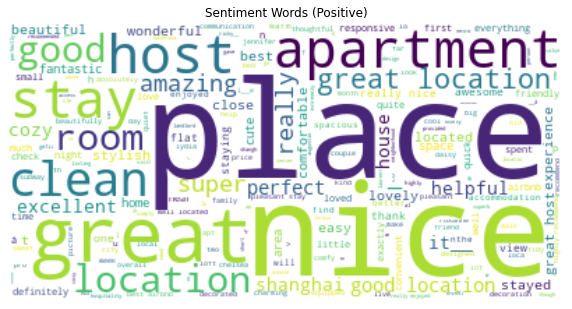

In [275]:
#Positive
from wordcloud import WordCloud
plt.figure( figsize=(10,10) )
wordcloud = WordCloud(background_color='white', relative_scaling=0, normalize_plurals = True).generate(positive['comments'].to_string().lower())
plt.title("Sentiment Words (Positive)")

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

#### Tokyo

In [276]:
#summary 
select = pd.DataFrame()
select = tky_r[['comments']]
vect = CountVectorizer()
scores = []
for i in select['comments']:
    score = string_score(str(i),score_word_dict)
    scores.append(score)
select['scores'] = scores
select.sort_values(ascending = False,by = 'scores',inplace = True)
select.tail()

comments  scores
17124  Es ist eine schÃ¶ne Unterkunft. Sie war grÃ¶_e...     -23
16215  Die Wohnung von Emily ist sehr gut gelegen. Ma...     -23
20606  Extremely terrible experience!  The owner is a...     -25
16301  Wir haben zweimal in Emily__ Unterkunft verbra...     -29
21988  Wer typisches japanisches Wohnen in der Gro_st...     -34

In [277]:
positive = select[select['scores'] >= 5]
#negative = select[select['scores'] < -10]
print(f"ada {len(positive)} summary positif")
#print(f"ada {len(negative)} summary negativ")

ada 7001 summary positif


(-0.5, 399.5, 199.5, -0.5)

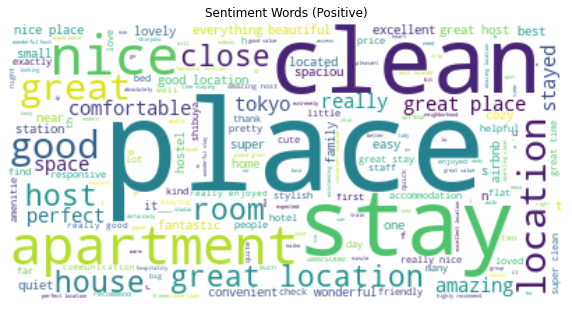

In [278]:
#Positive
from wordcloud import WordCloud
plt.figure( figsize=(10,10) )
wordcloud = WordCloud(background_color='white', relative_scaling=0, normalize_plurals = True).generate(positive['comments'].to_string().lower())
plt.title("Sentiment Words (Positive)")

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

#### Singapore

In [279]:
#summary 
from sklearn.feature_extraction.text import CountVectorizer
select = pd.DataFrame()
select = sp_r[['comments']]
vect = CountVectorizer()
scores = []
for i in select['comments']:
    score = string_score(str(i),score_word_dict)
    scores.append(score)
select['scores'] = scores
select.sort_values(ascending = False,by = 'scores',inplace = True)
select.tail()

comments  scores
369   Personally i wouldnt recommend staying here. W...     -16
2209  Leider hat die Unterkunft nicht ganz unseren V...     -16
2525  The experience in Rajan__ house had NOT A THIN...     -18
6915  Die Unterkunft an sich ist in Ordnung. Im Prin...     -19
5103  We stayed at this location between 5-12 Nov 20...     -30

In [280]:
positive = select[select['scores'] >= 5]
#negative = select[select['scores'] < -10]
print(f"ada {len(positive)} summary positif")
#print(f"ada {len(negative)} summary negativ")

ada 3304 summary positif


(-0.5, 399.5, 199.5, -0.5)

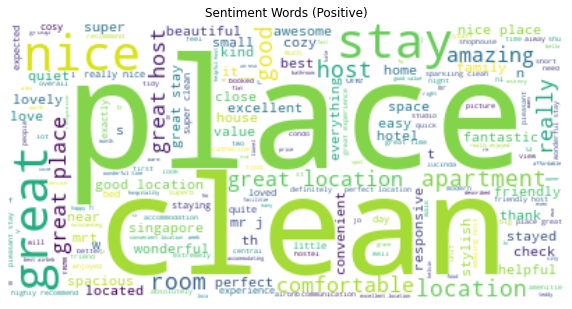

In [281]:
#Positive
from wordcloud import WordCloud
plt.figure( figsize=(10,10) )
wordcloud = WordCloud(background_color='white', relative_scaling=0, normalize_plurals = True).generate(positive['comments'].to_string().lower())
plt.title("Sentiment Words (Positive)")

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

#### Istanbul

In [282]:
#summary 
from sklearn.feature_extraction.text import CountVectorizer
select = pd.DataFrame()
select = istanbul[['comments']]
vect = CountVectorizer()
scores = []
for i in select['comments']:
    score = string_score(str(i),score_word_dict)
    scores.append(score)
select['scores'] = scores
select.sort_values(ascending = False,by = 'scores',inplace = True)
select.tail()

comments  scores
8401   Ich habe die Buchung aufgrund der positiven Er...     -20
13295  Die Wohnung ist sehr zentral, 1 Minute vom Tak...     -20
20222  Die Wohnung war genau nach meinen Erwartungen....     -26
20551  Wir waren unter den ersten GÃ¤sten in Ahmets W...     -29
2279   Ich habe stolze 5 Monate in Istanbul verbracht...     -41

In [283]:
positive = select[select['scores'] >= 5]
#negative = select[select['scores'] < -10]
print(f"ada {len(positive)} summary positif")
#print(f"ada {len(negative)} summary negativ")

ada 11517 summary positif


(-0.5, 399.5, 199.5, -0.5)

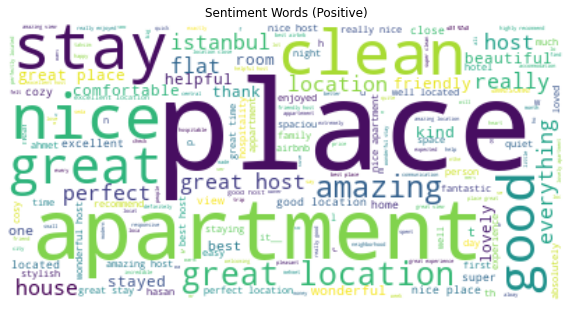

In [284]:
#Positive
from wordcloud import WordCloud
plt.figure( figsize=(10,10) )
wordcloud = WordCloud(background_color='white', relative_scaling=0, normalize_plurals = True).generate(positive['comments'].to_string().lower())
plt.title("Sentiment Words (Positive)")

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")